In [27]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns


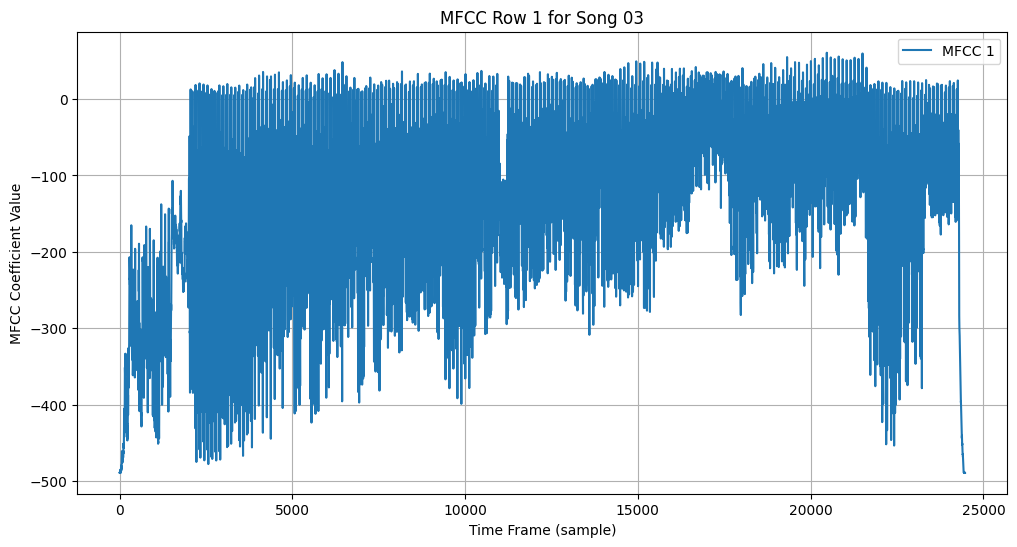

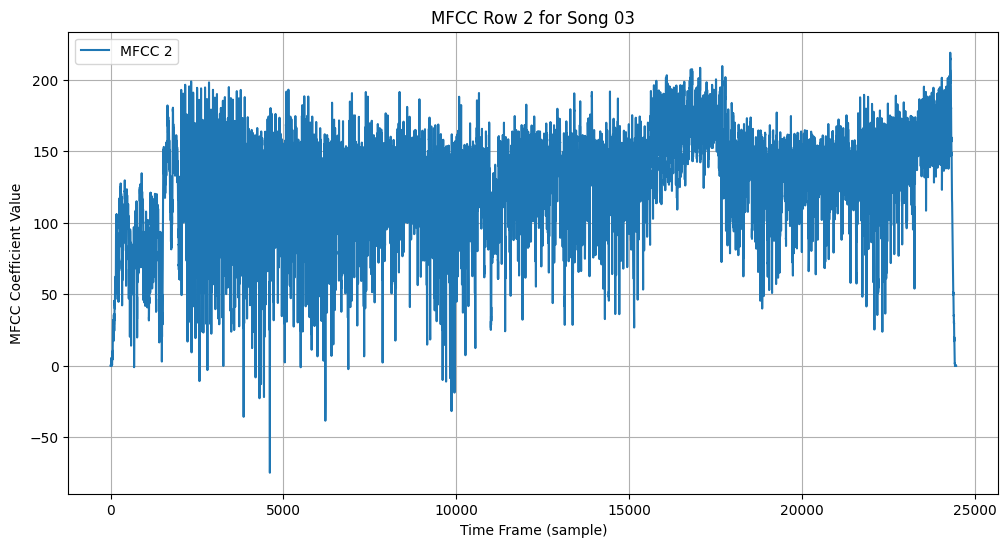

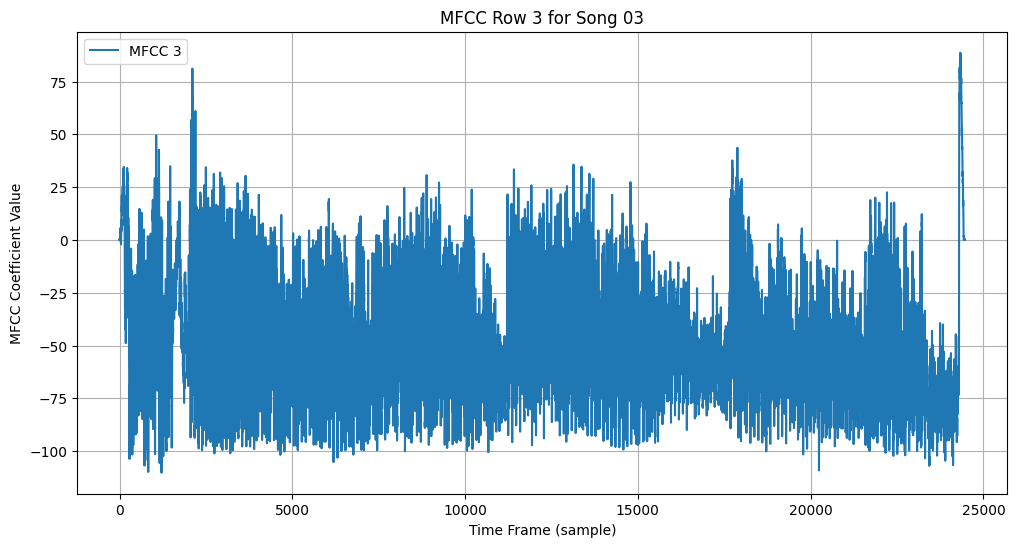

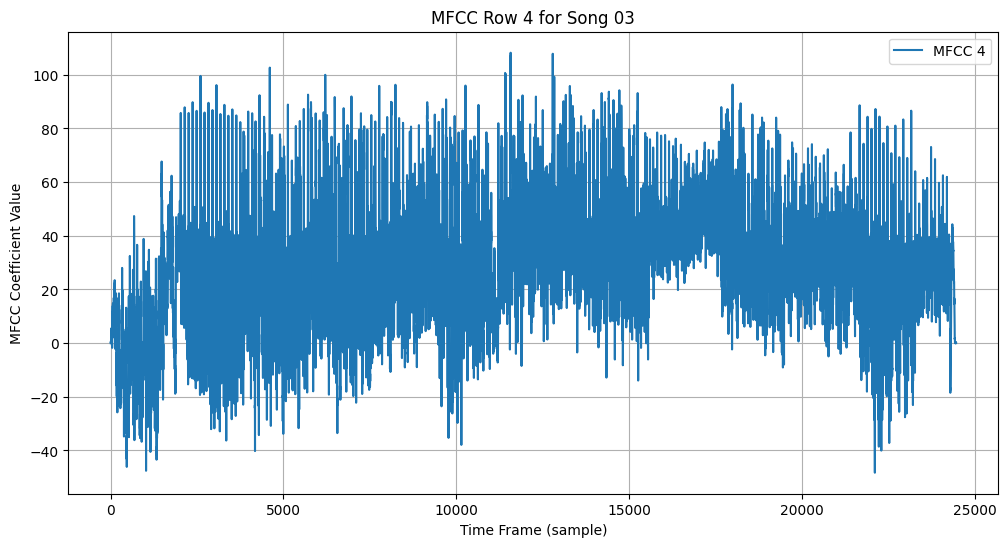

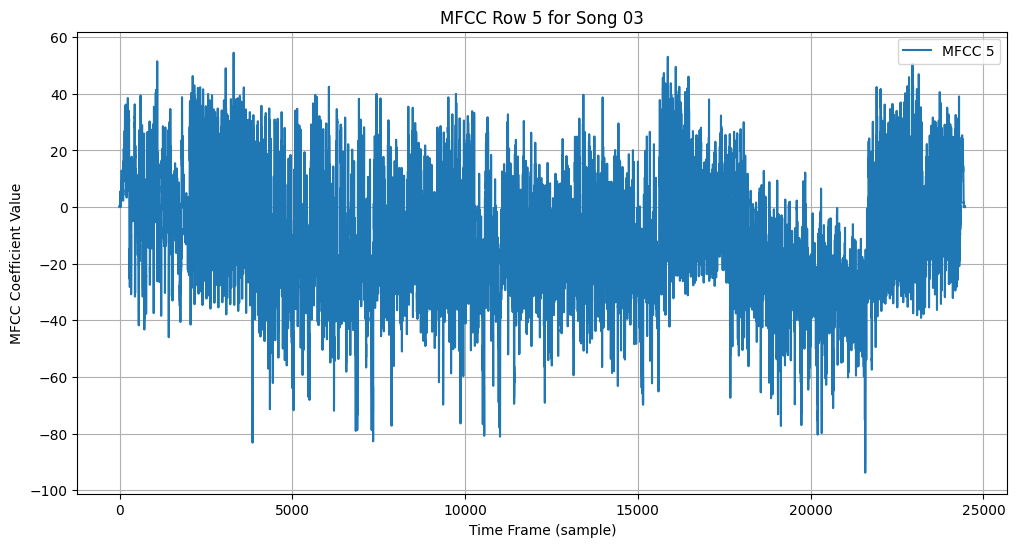

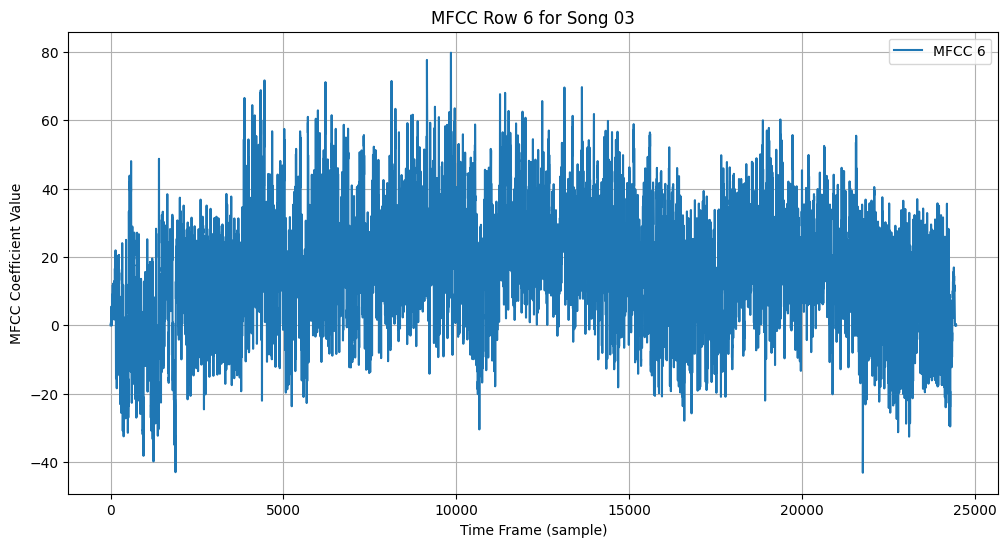

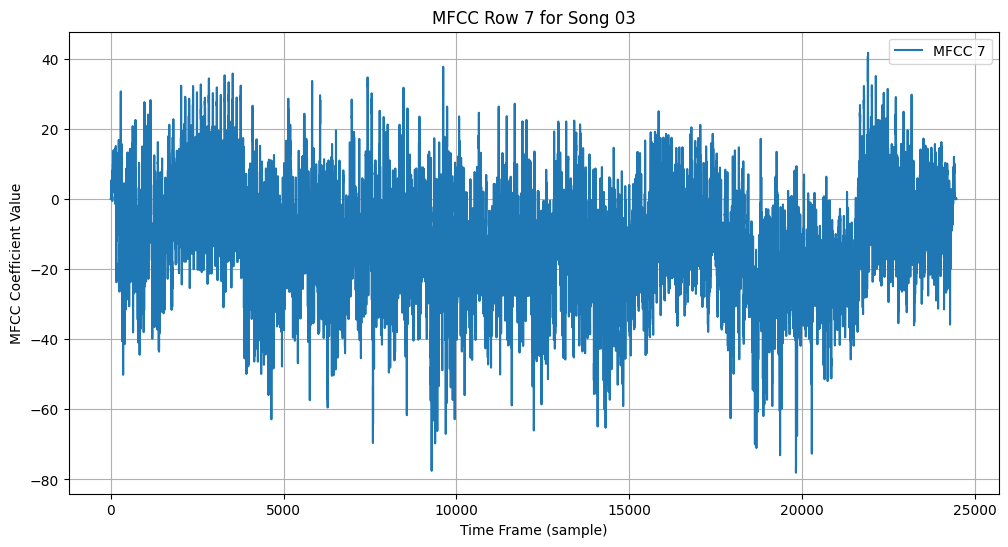

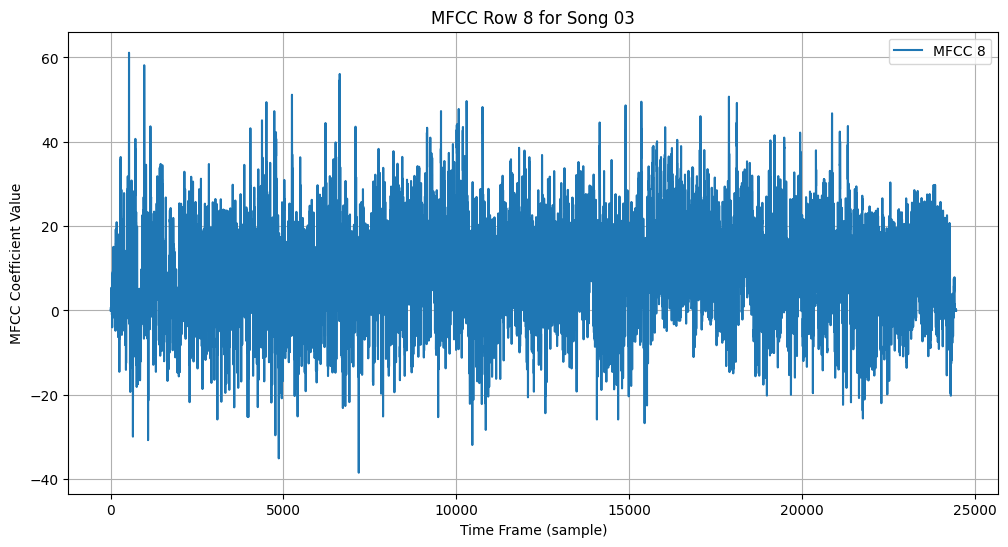

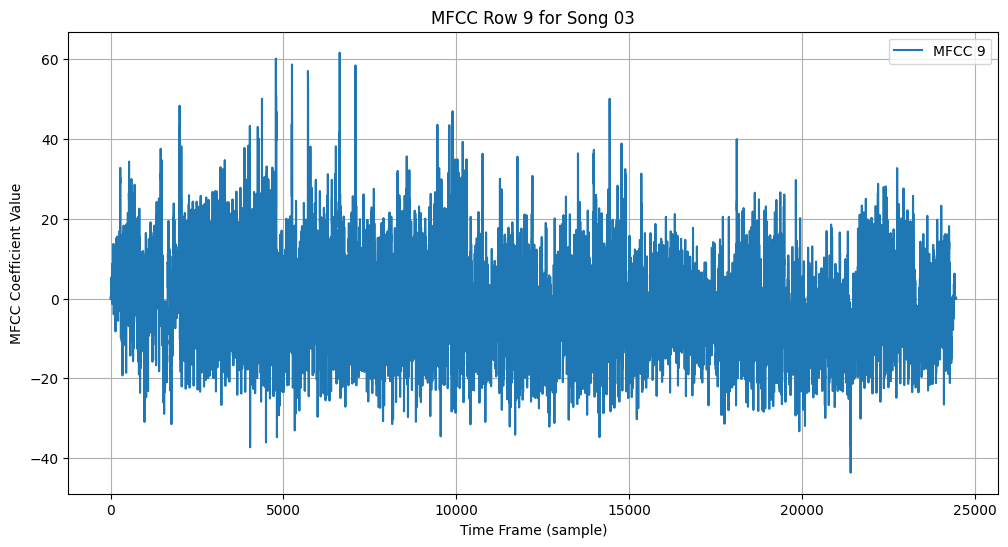

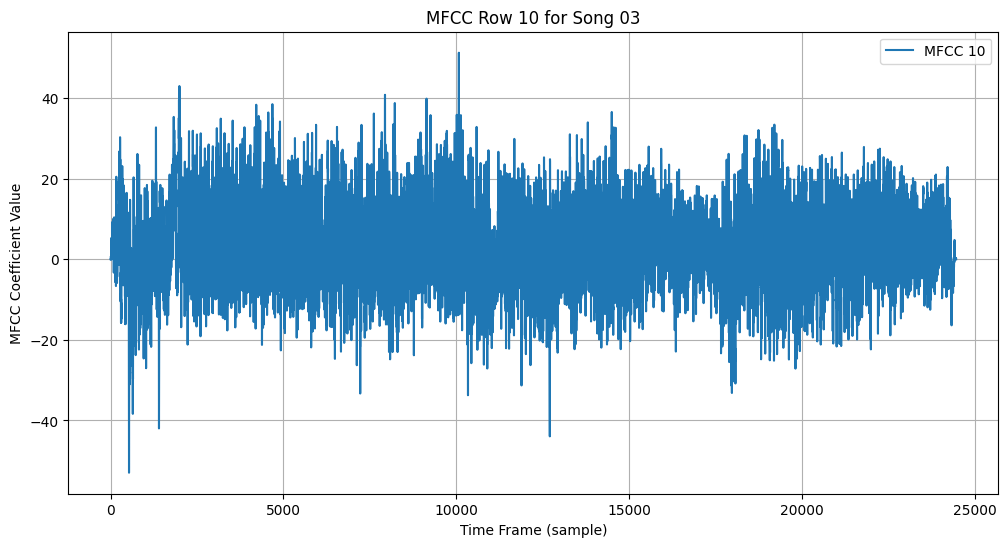

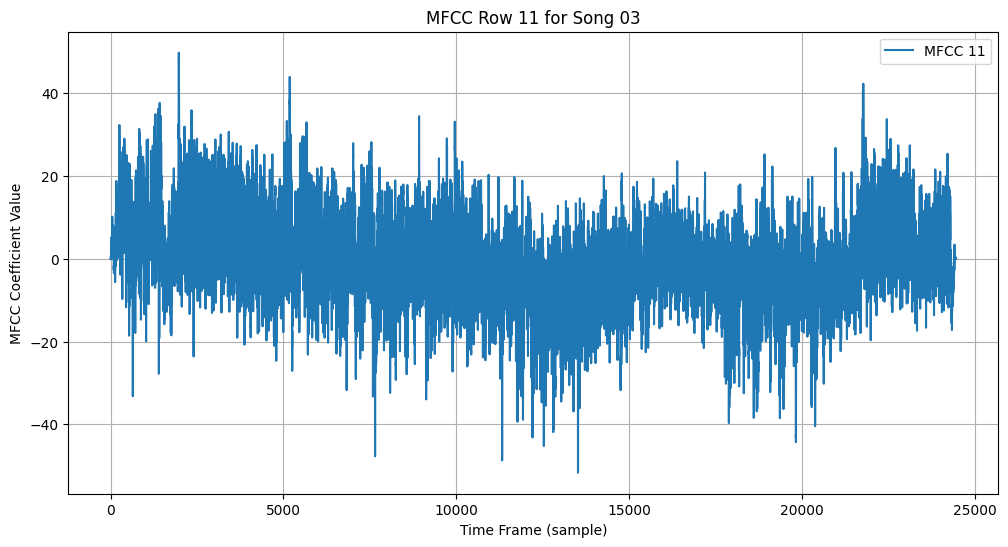

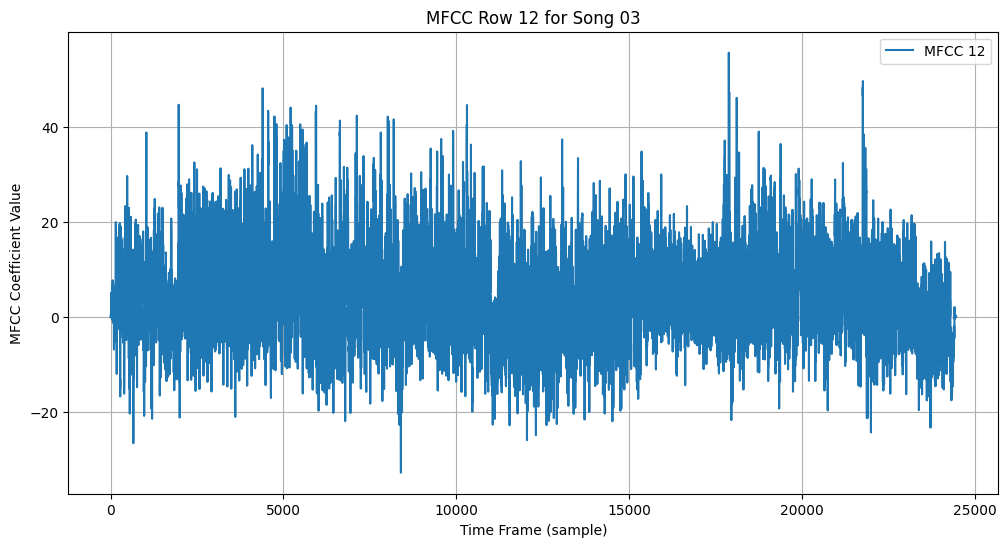

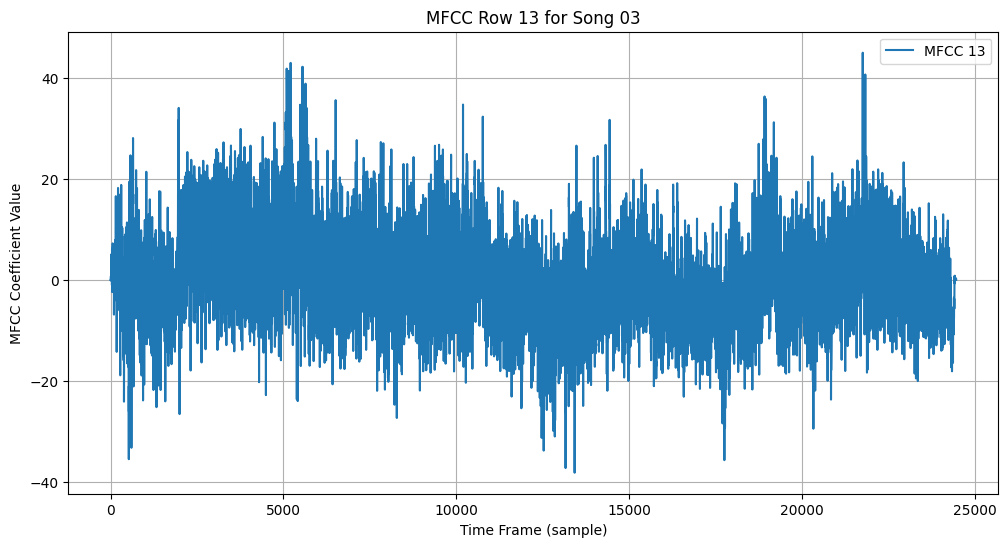

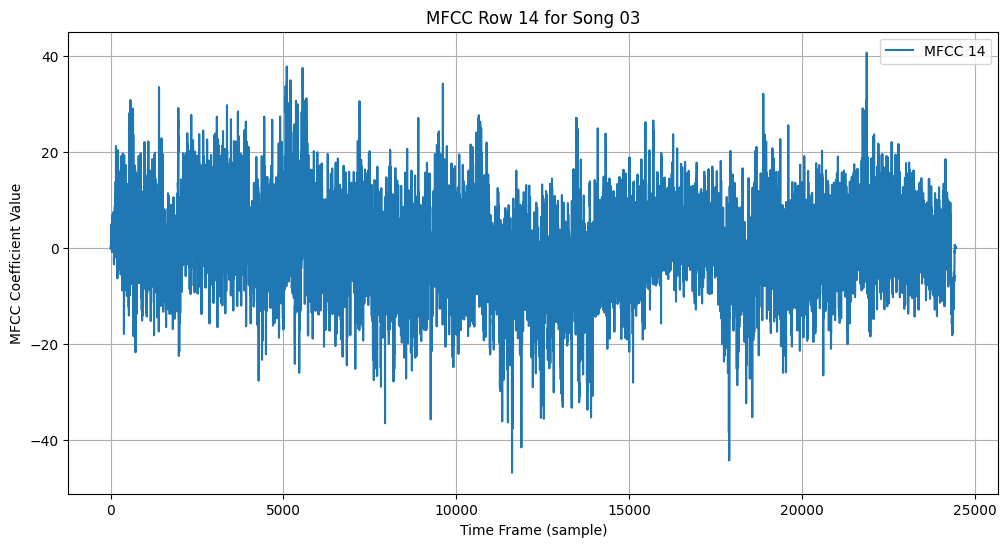

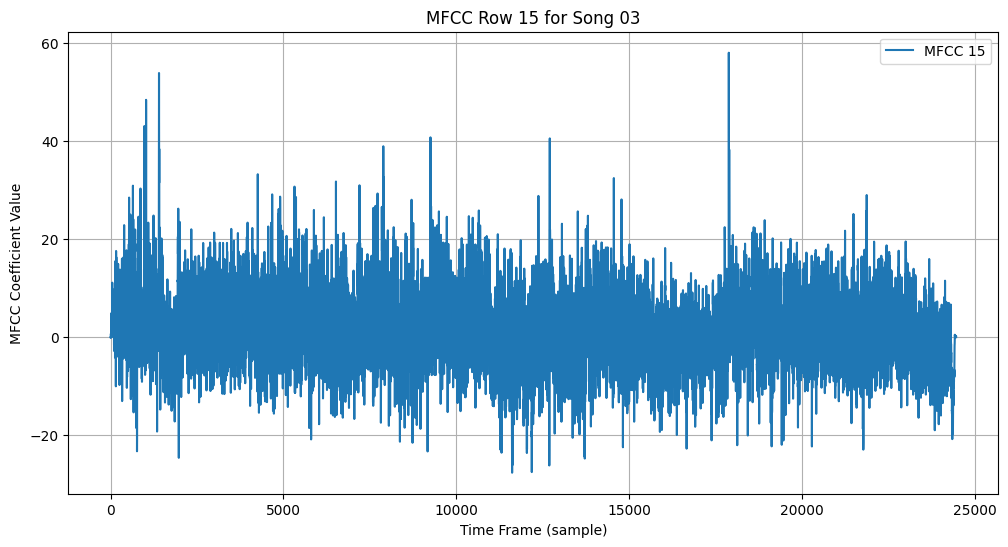

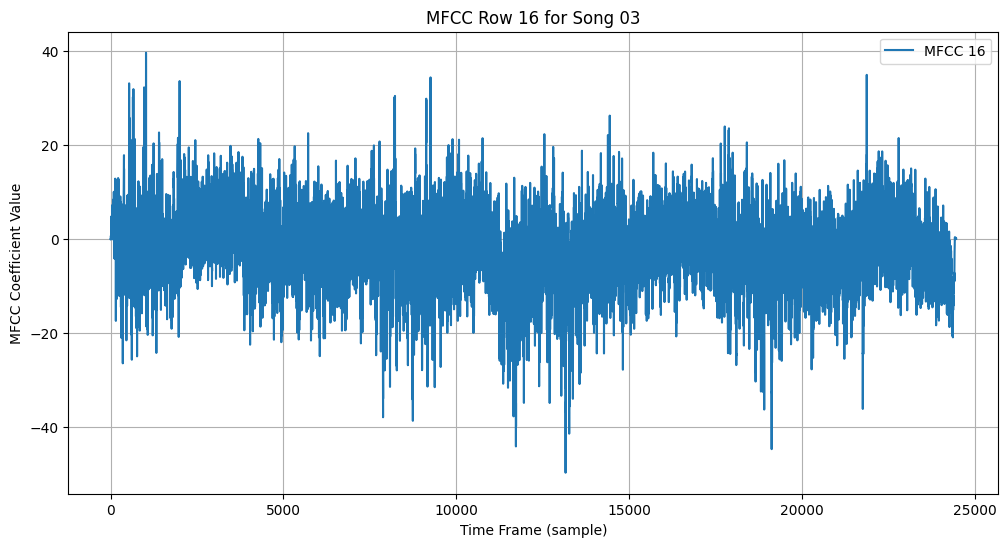

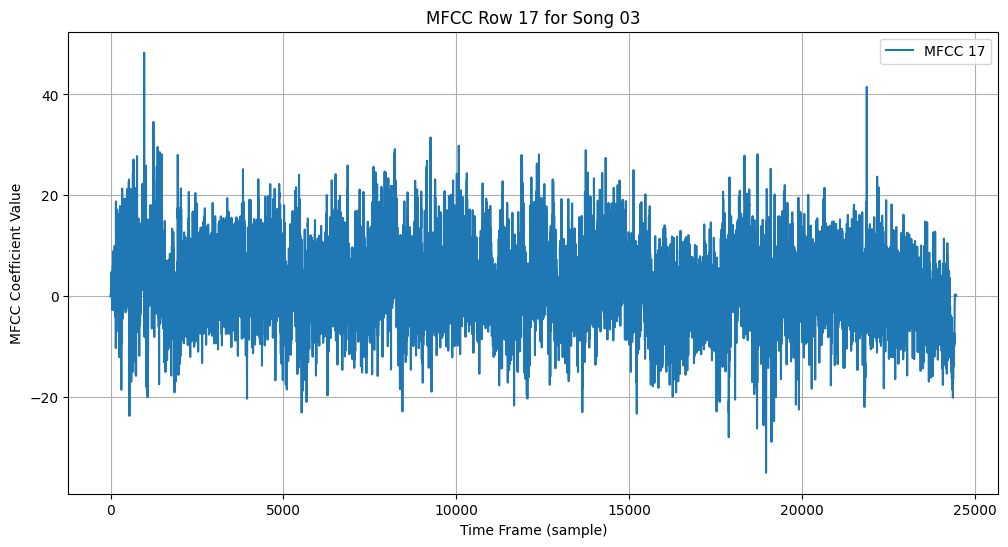

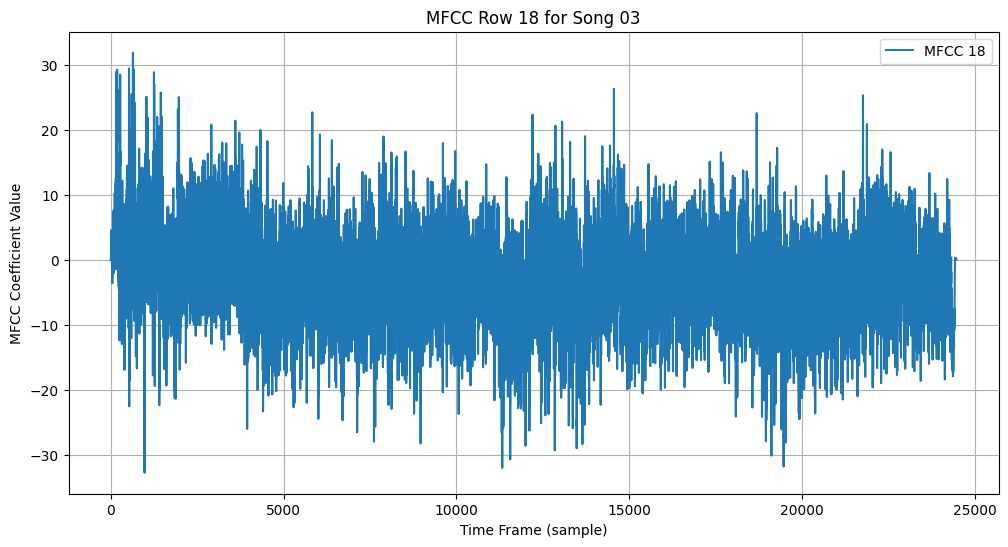

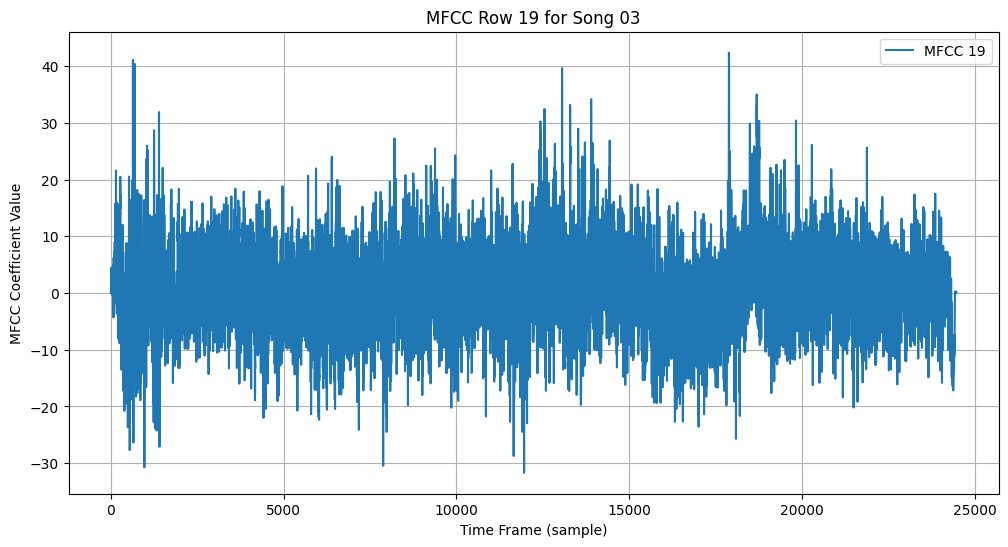

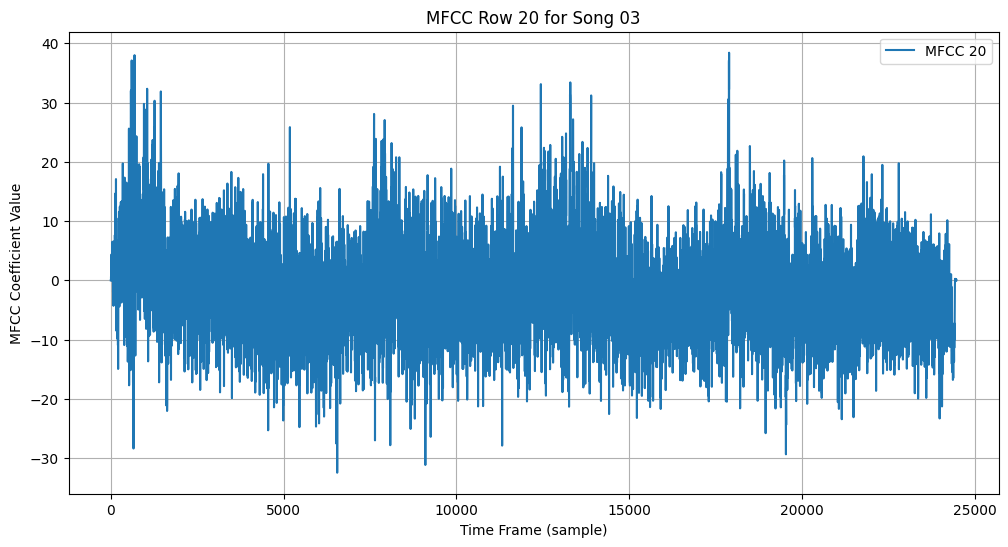

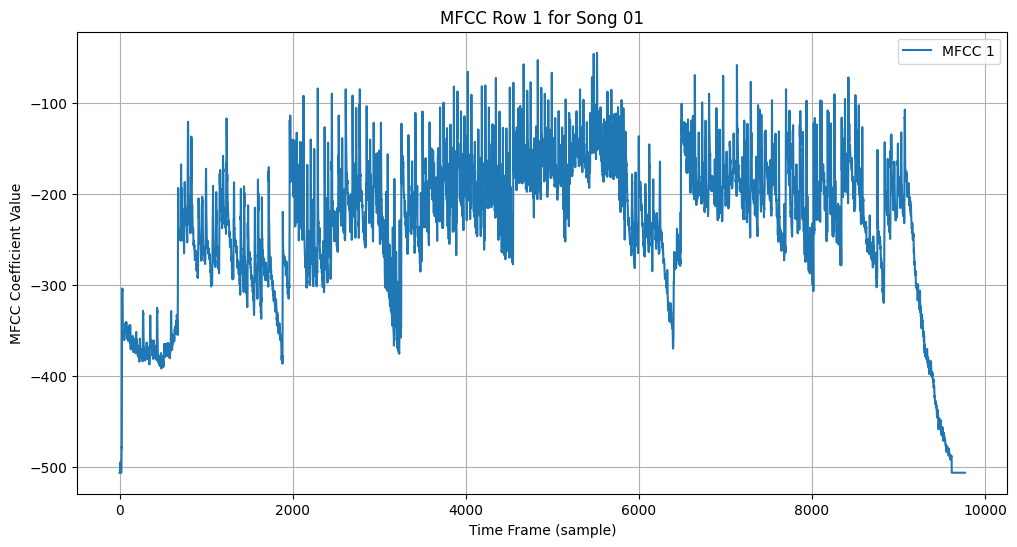

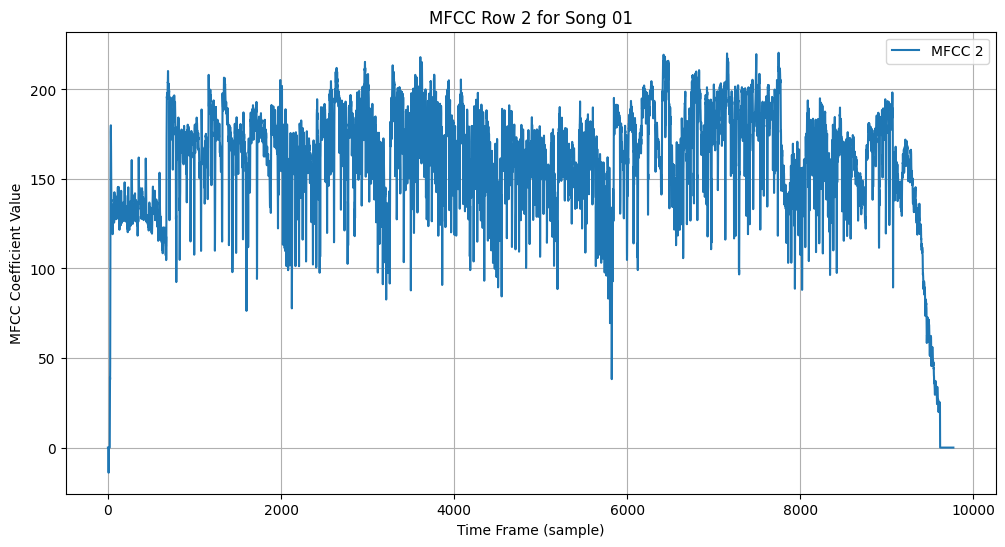

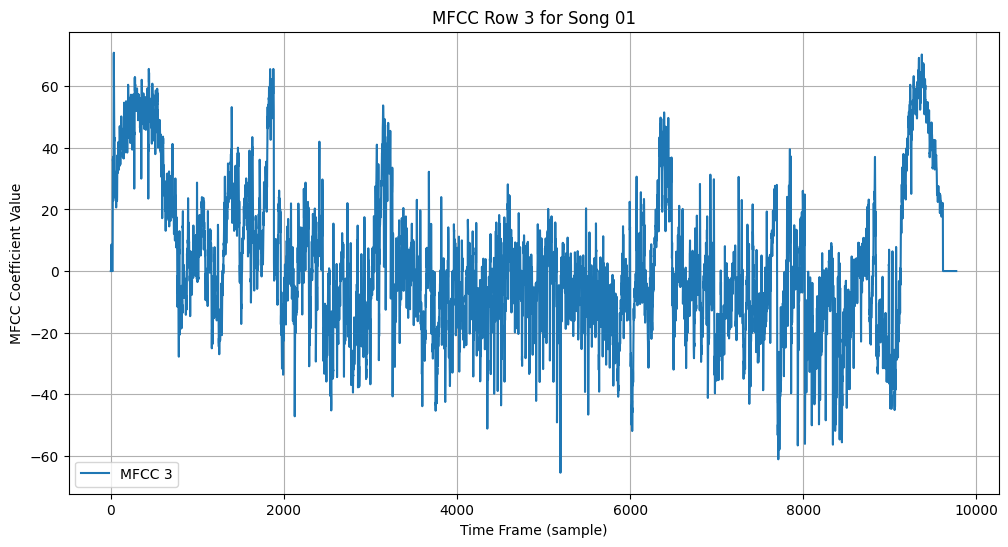

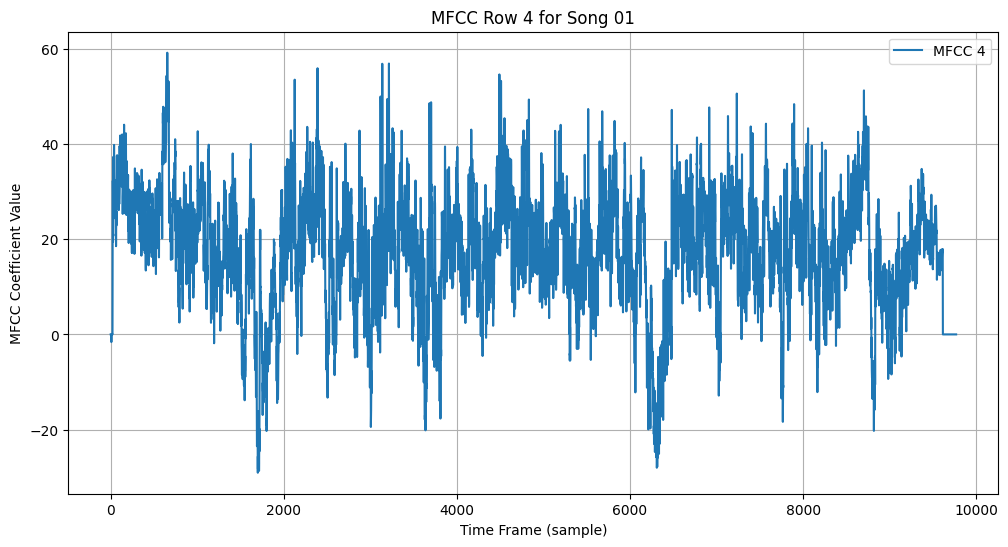

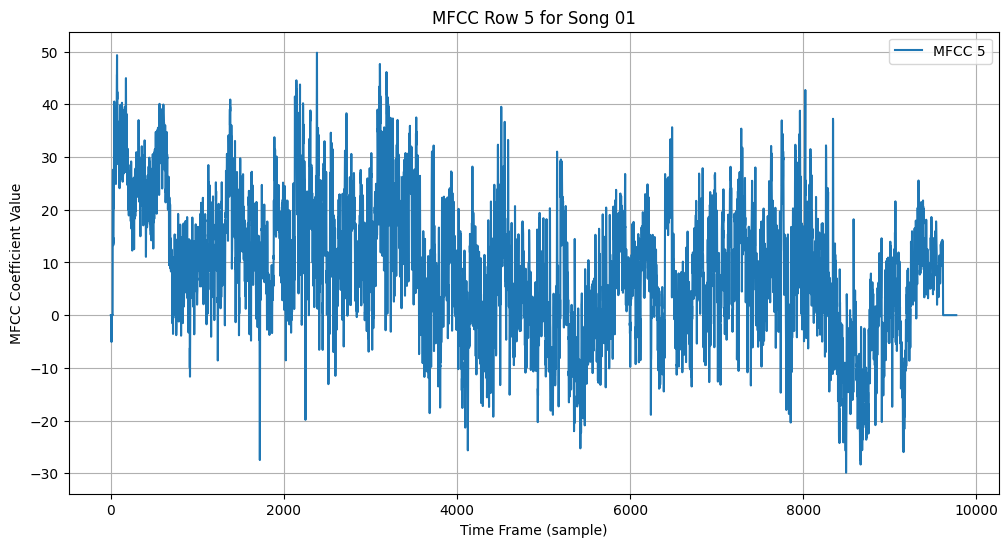

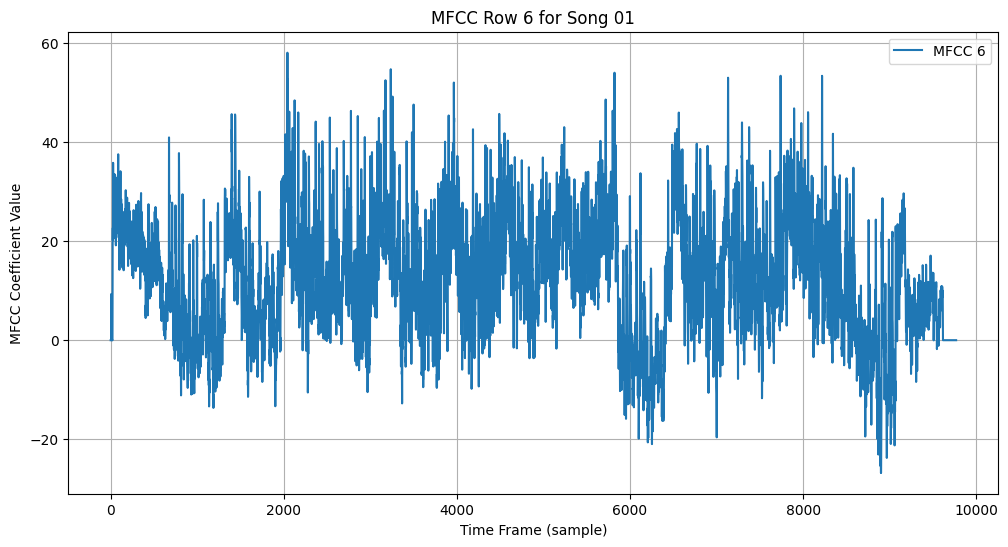

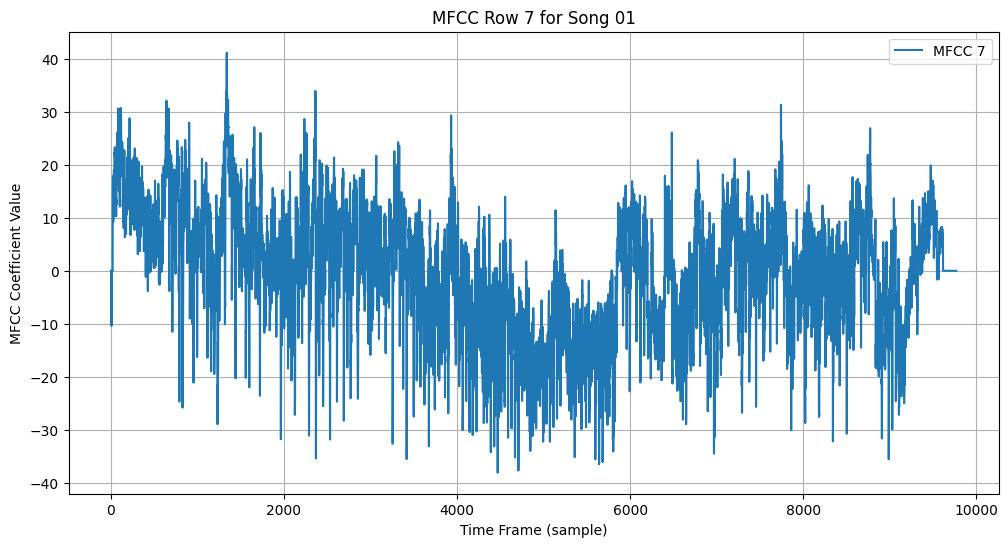

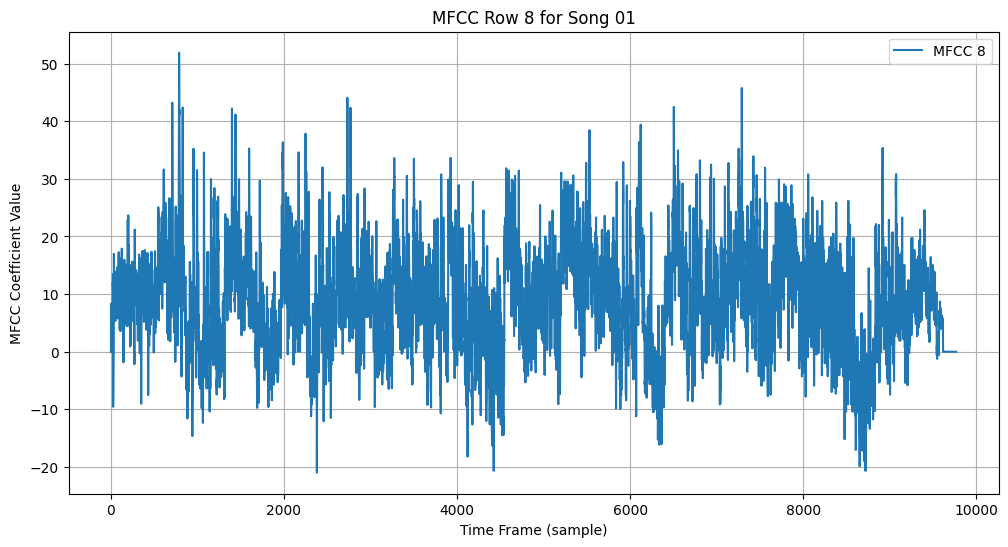

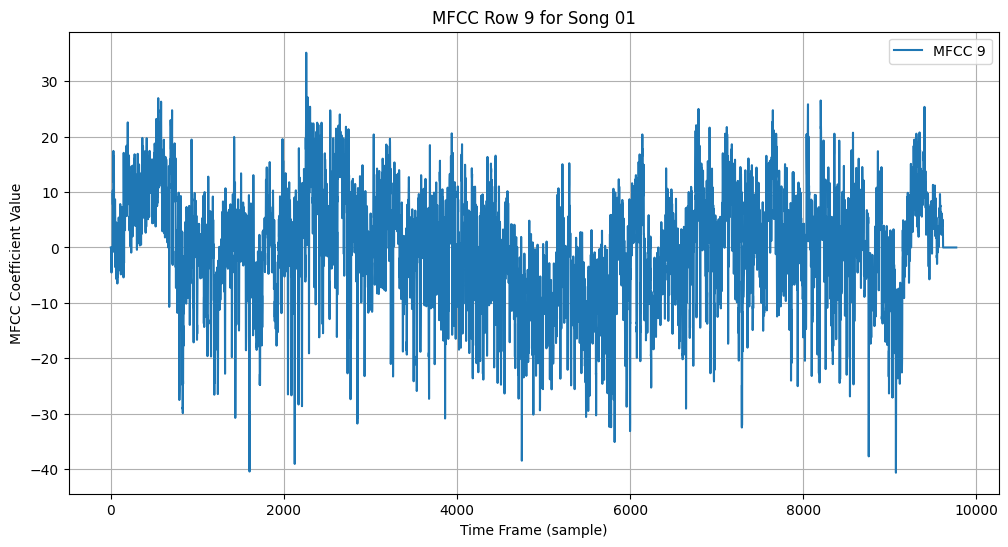

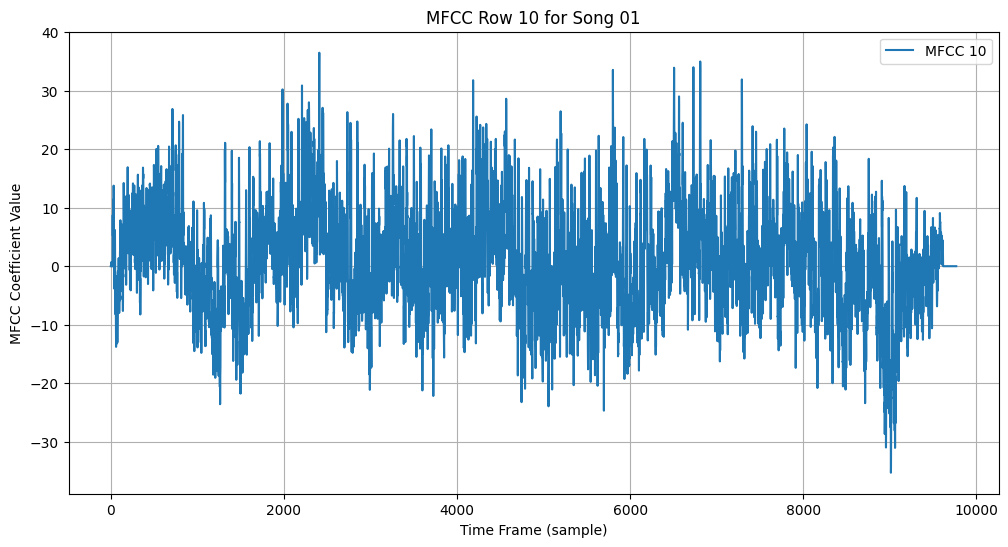

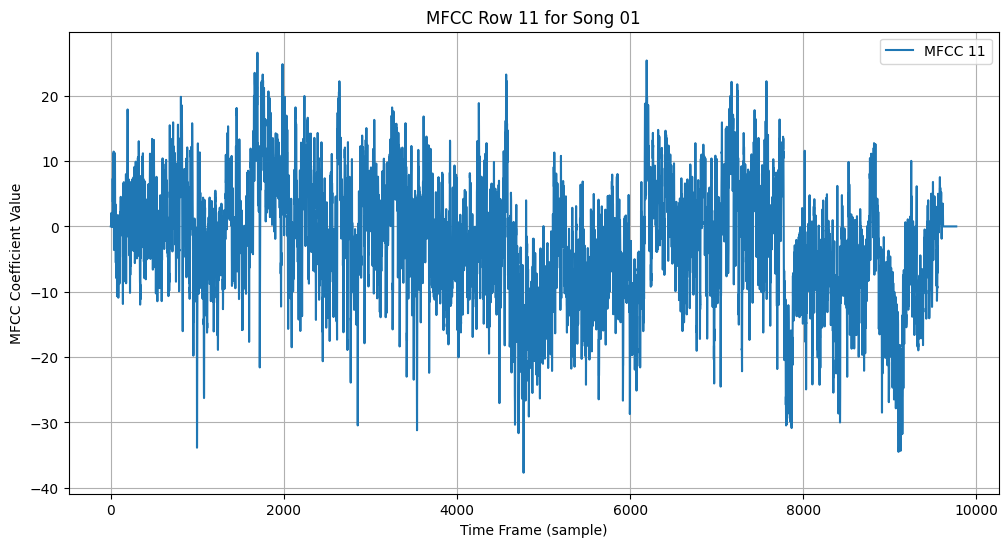

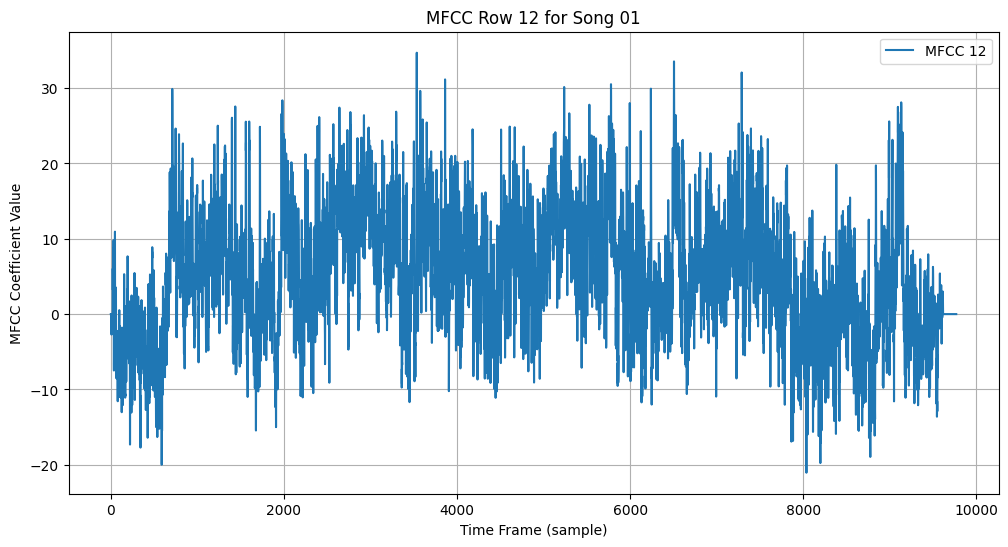

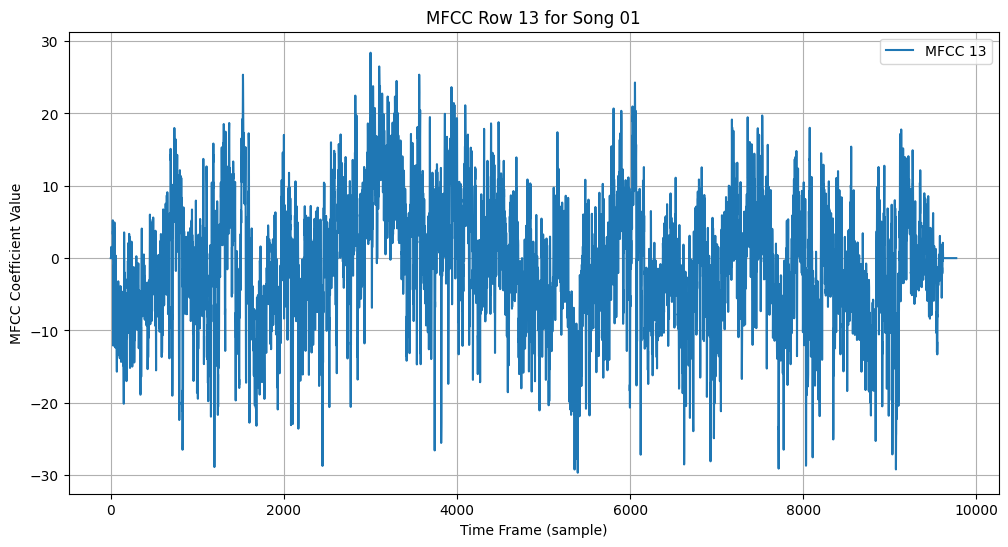

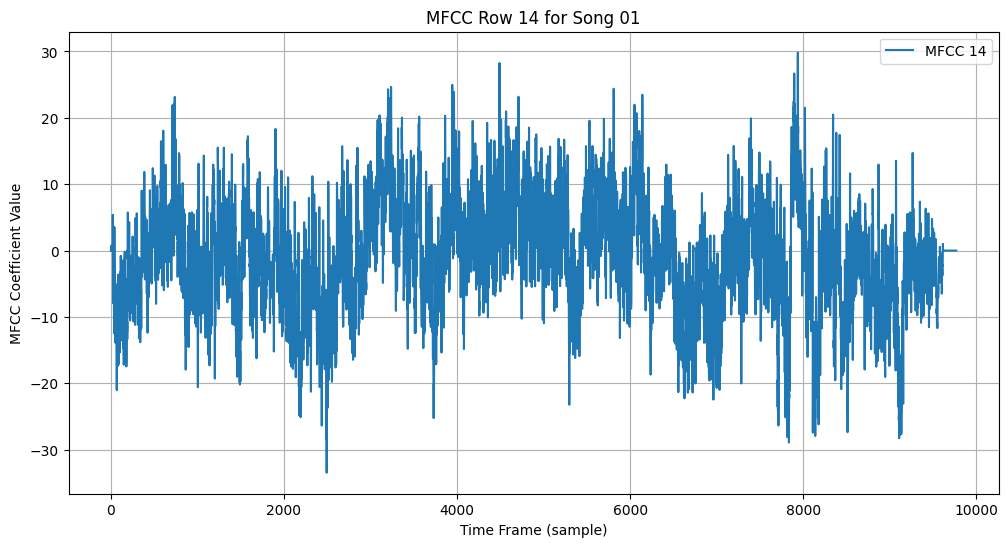

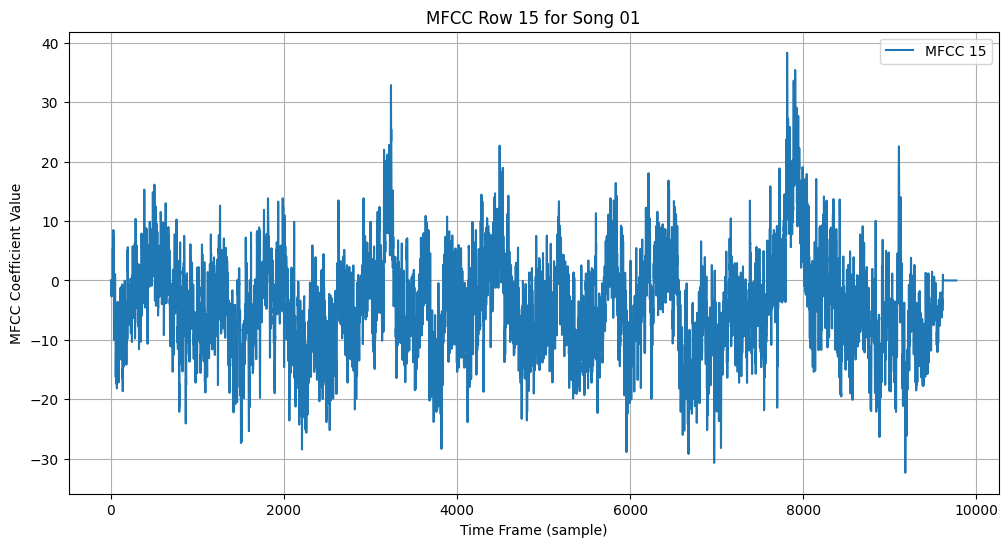

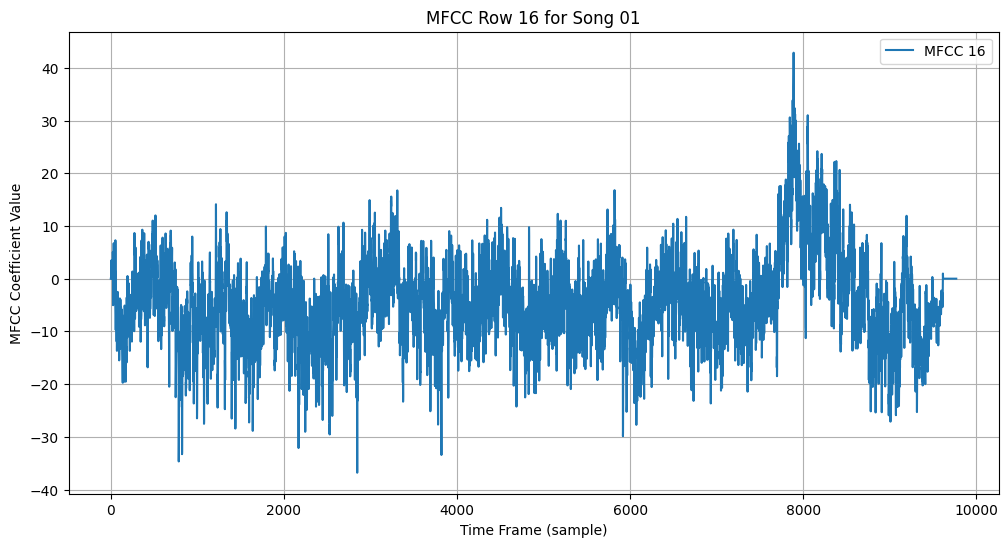

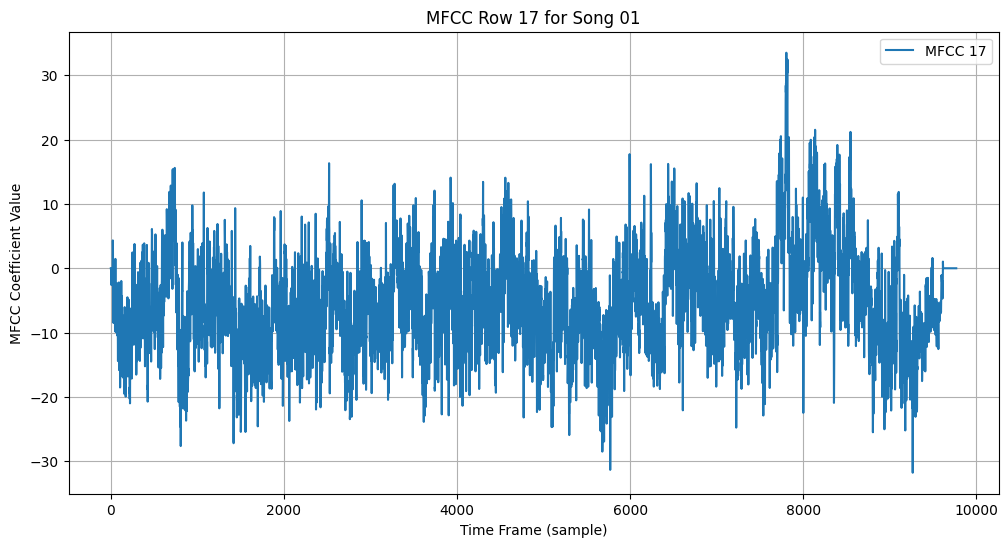

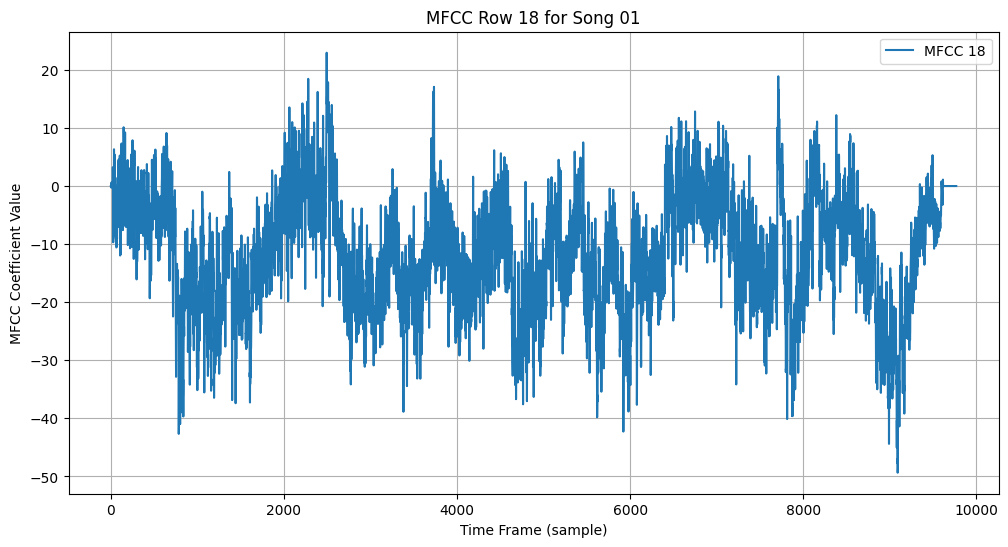

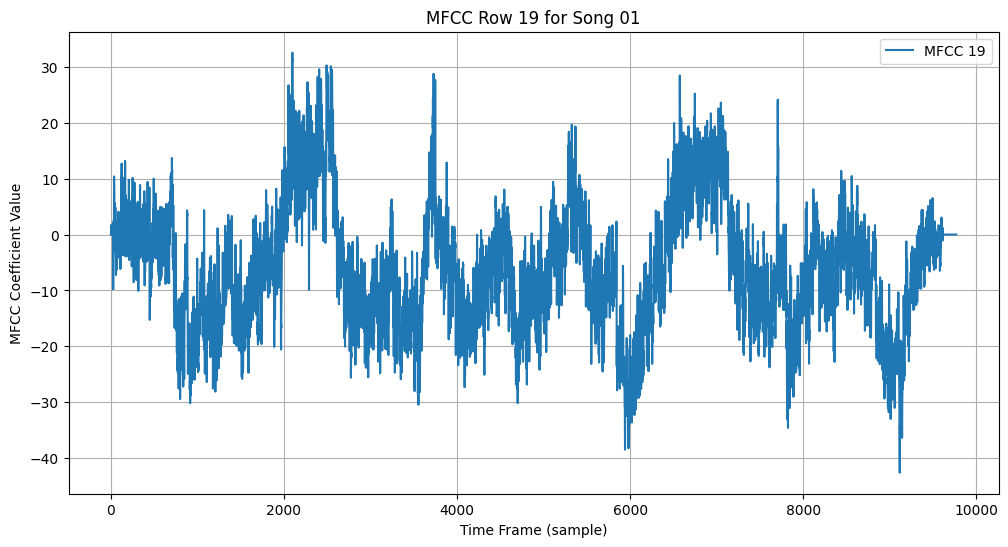

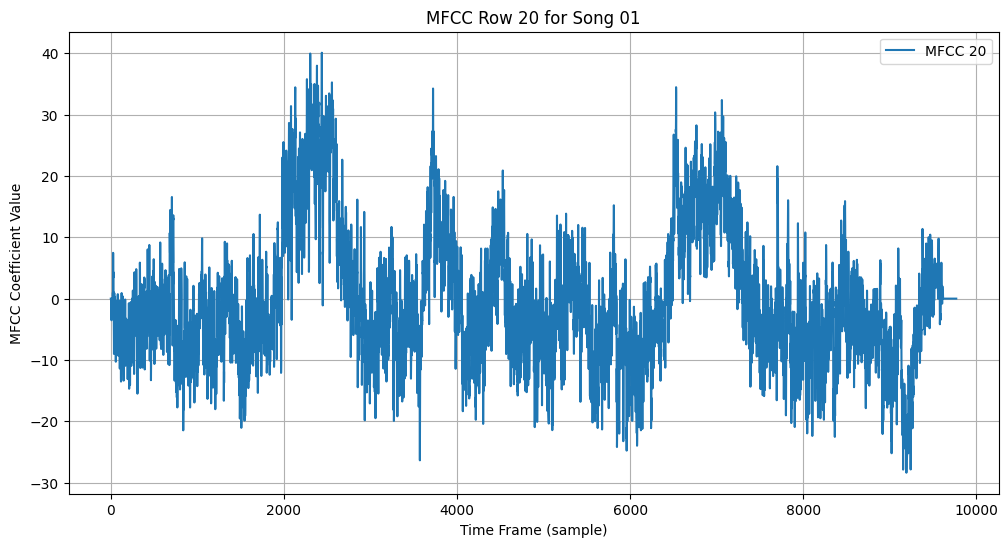

In [28]:
# Path to the directory containing MFCC CSV files
data_directory = 'TEST_MFCC'  # Ensure this is the correct path to your directory

# Specify the song number you want to analyze
song_numbers = {'03','01'}  # Change this to the specific song number (e.g., '01', '02', etc.)

# Function to load MFCC data for a given song and plot each row separately
for song_number in song_numbers:
    def plot_each_mfcc_row_for_song(data_directory, song_number):
        file_name = f'{song_number}-MFCC.csv'
        file_path = os.path.join(data_directory, file_name)
        
        if os.path.exists(file_path):
            mfcc_data = pd.read_csv(file_path, header=None)
            
            # Loop through each row (MFCC coefficient) and plot it separately
            for row_num in range(mfcc_data.shape[0]):
                plt.figure(figsize=(12, 6))
                plt.plot(mfcc_data.iloc[row_num, :], label=f'MFCC {row_num+1}')
                plt.title(f'MFCC Row {row_num+1} for Song {song_number}')
                plt.xlabel('Time Frame (sample)')
                plt.ylabel('MFCC Coefficient Value')
                plt.legend()
                plt.grid()
                plt.show()  # Display the plot
        else:
            print(f"File {file_name} not found in directory.")
    
    # Plot each row for the specified song and display the plots
    plot_each_mfcc_row_for_song(data_directory, song_number)

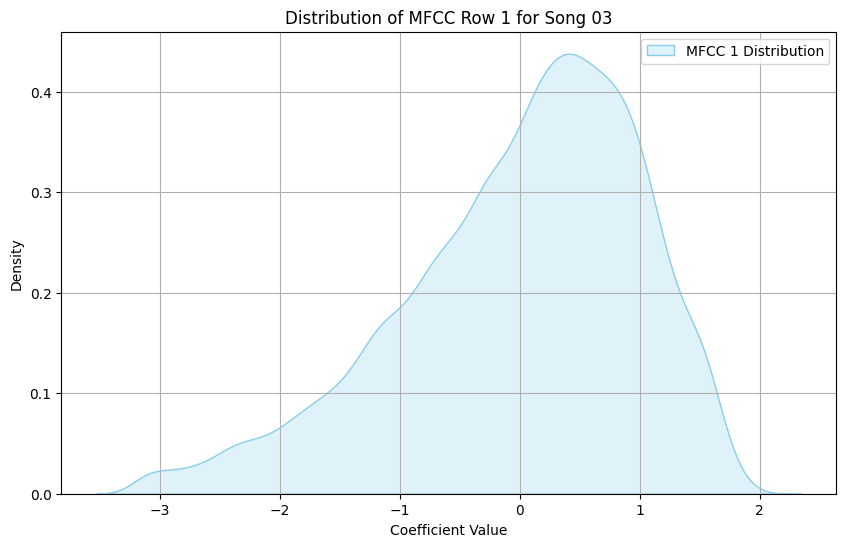

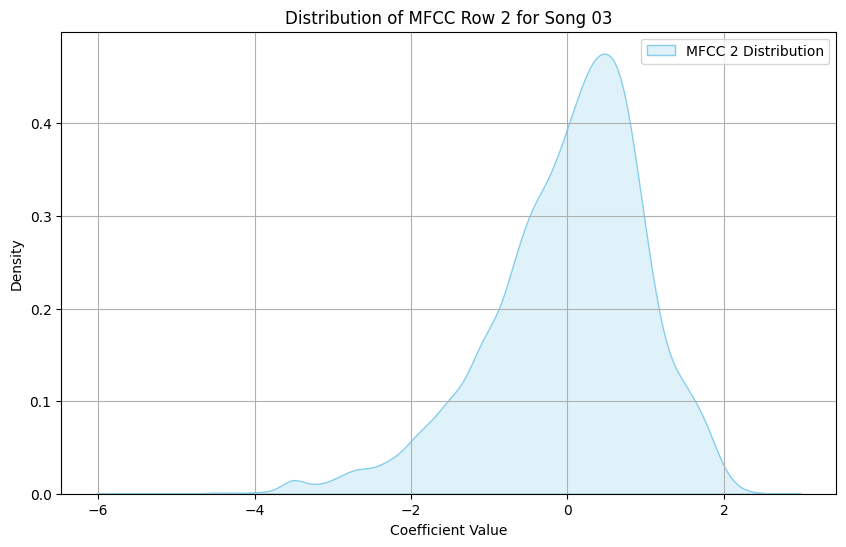

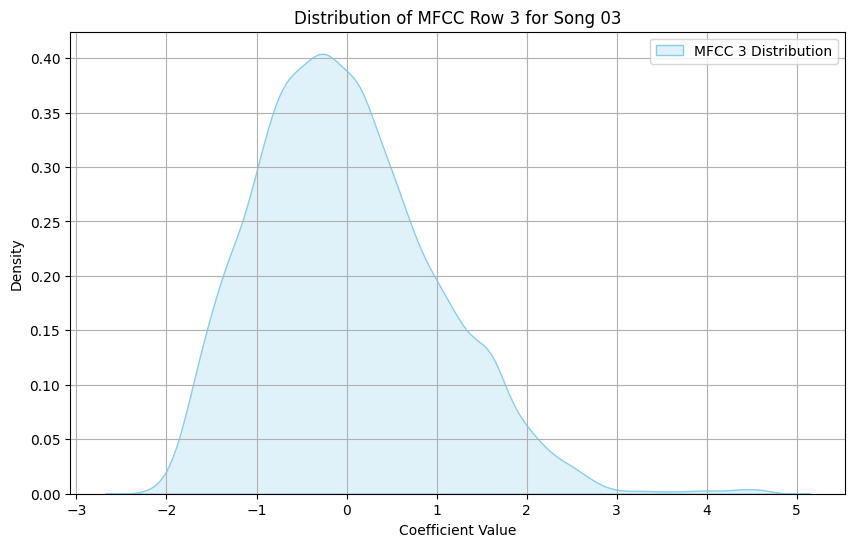

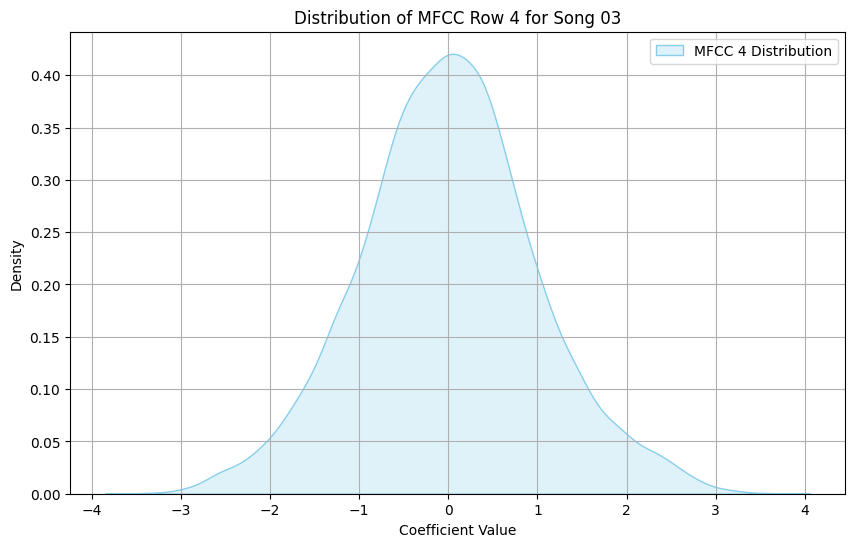

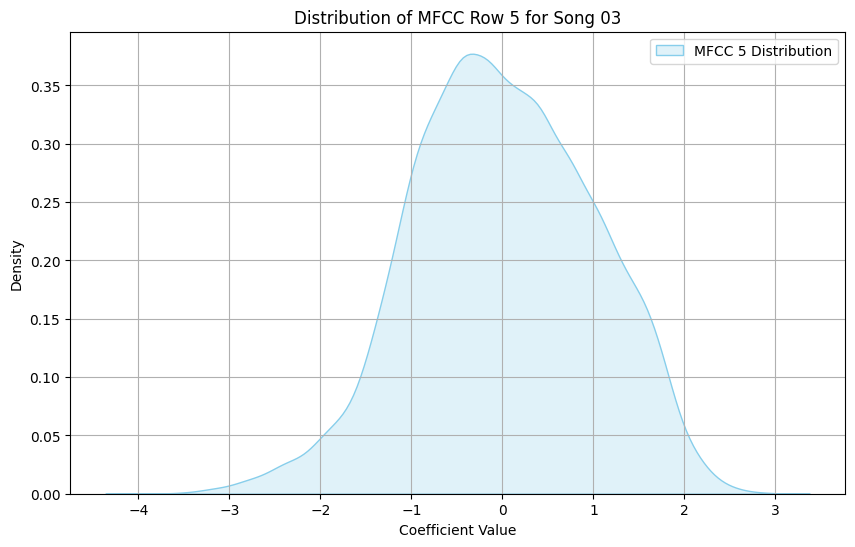

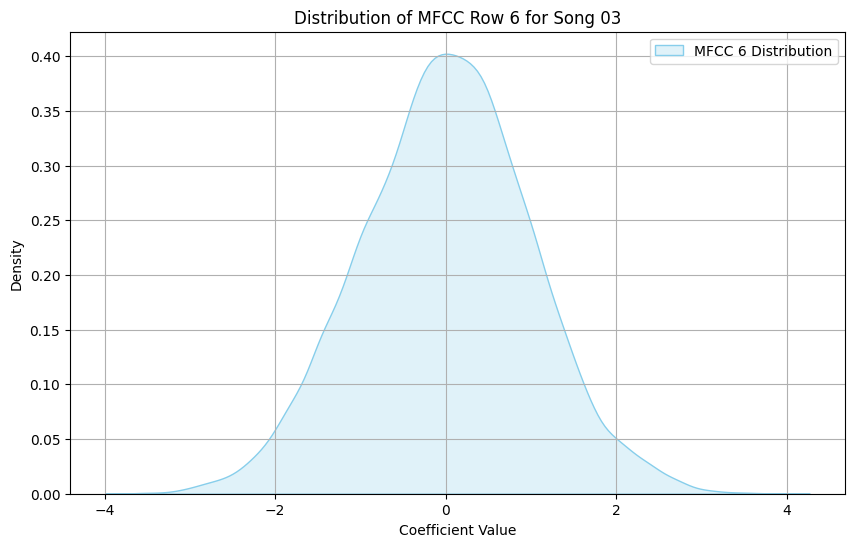

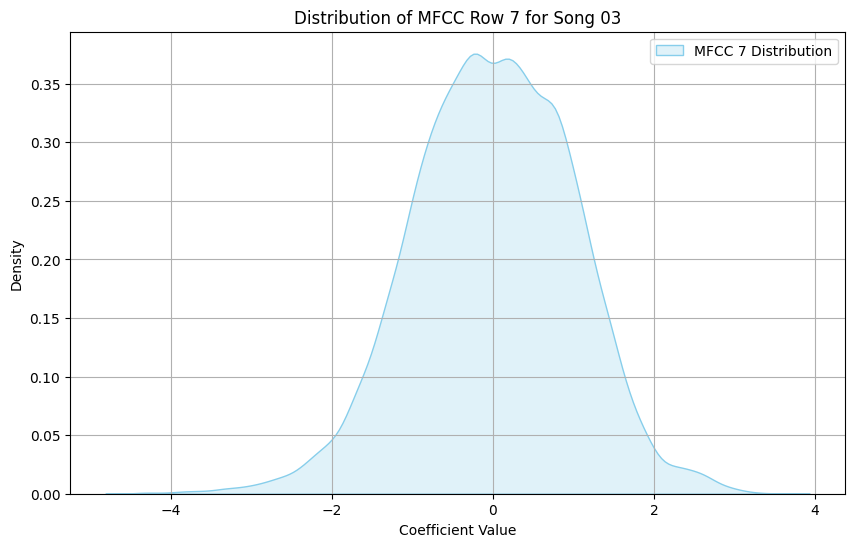

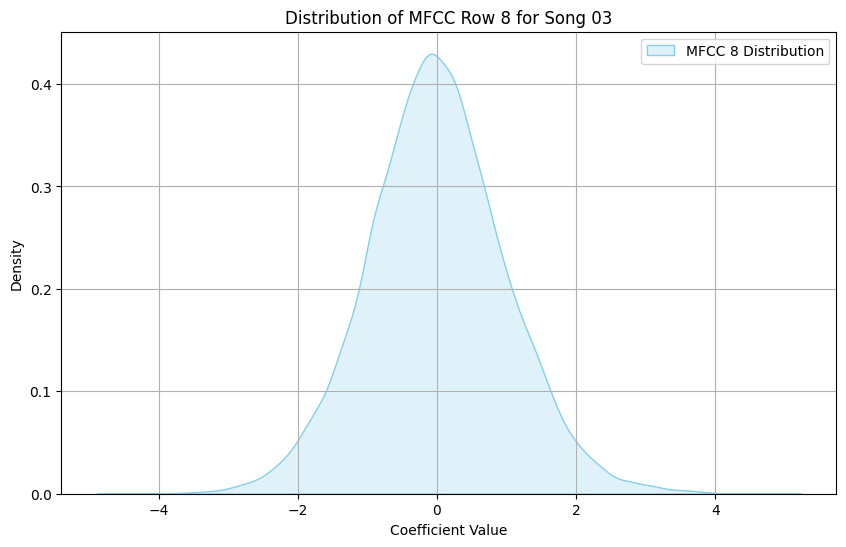

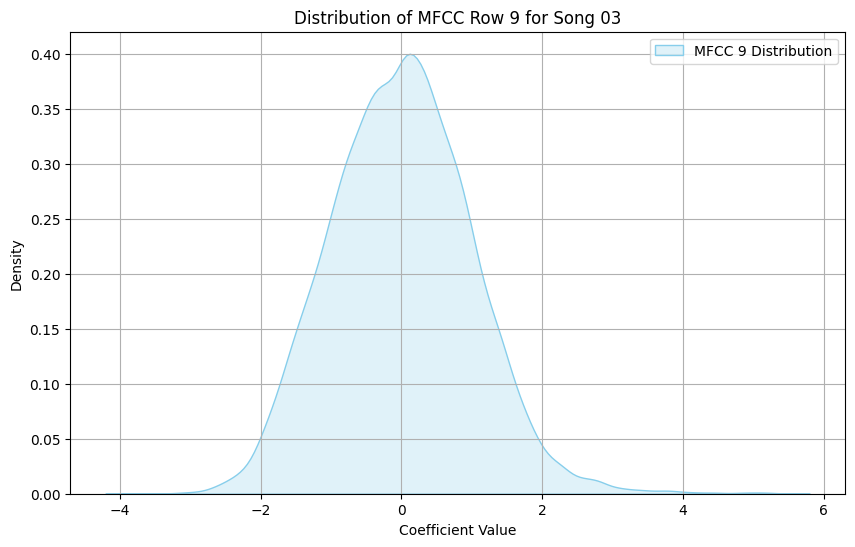

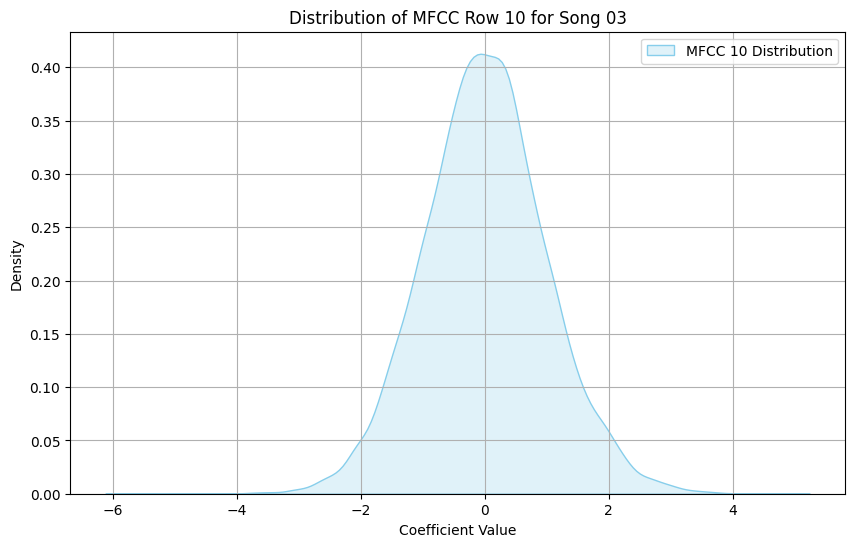

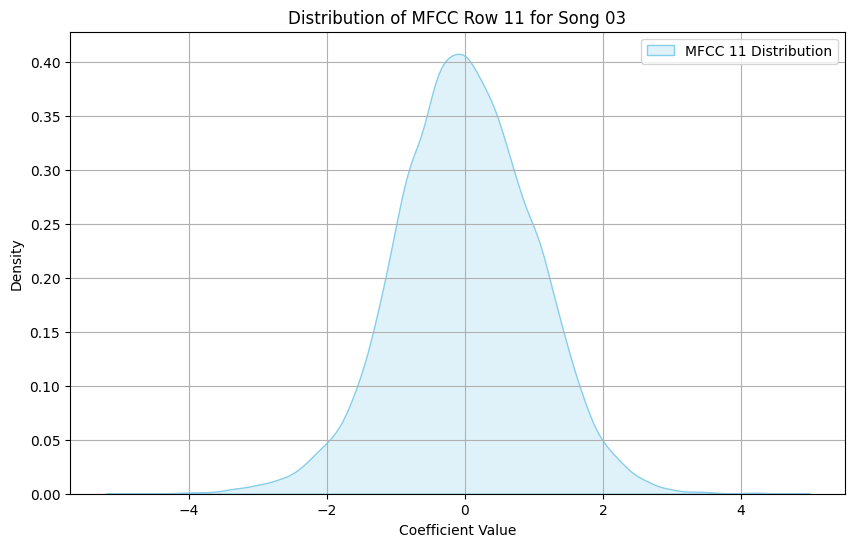

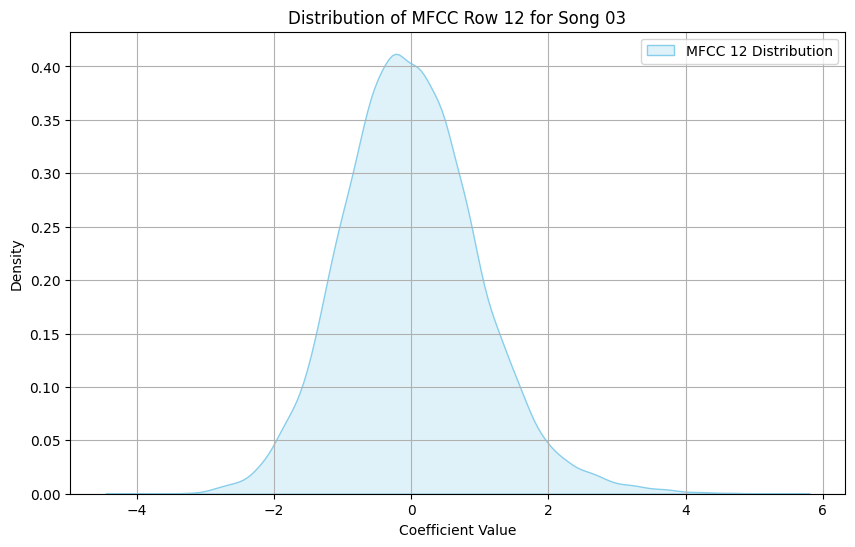

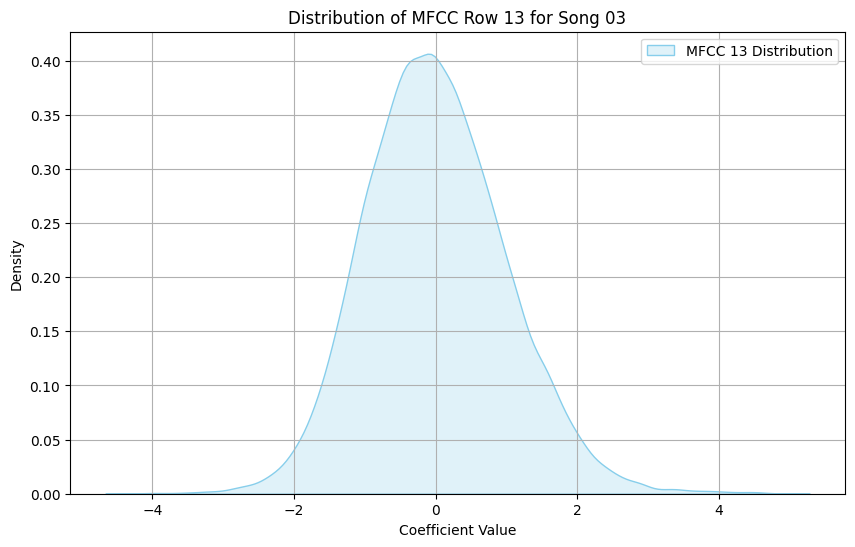

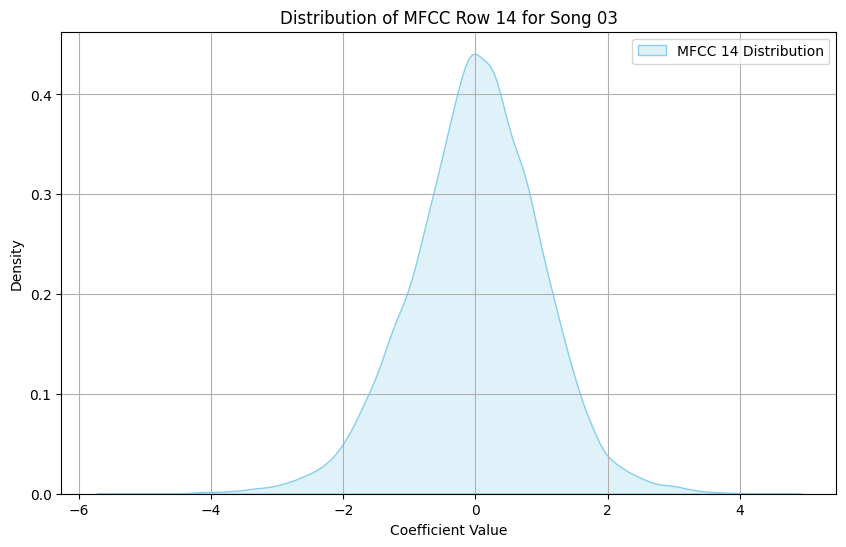

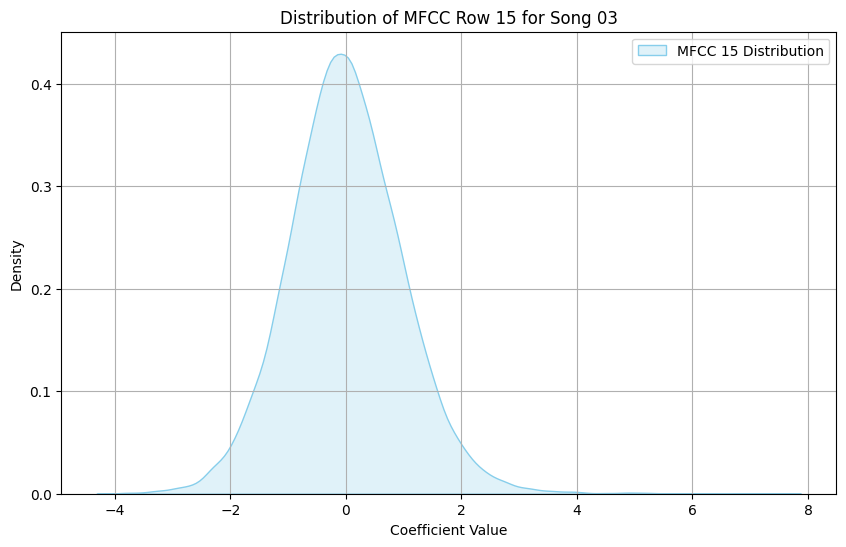

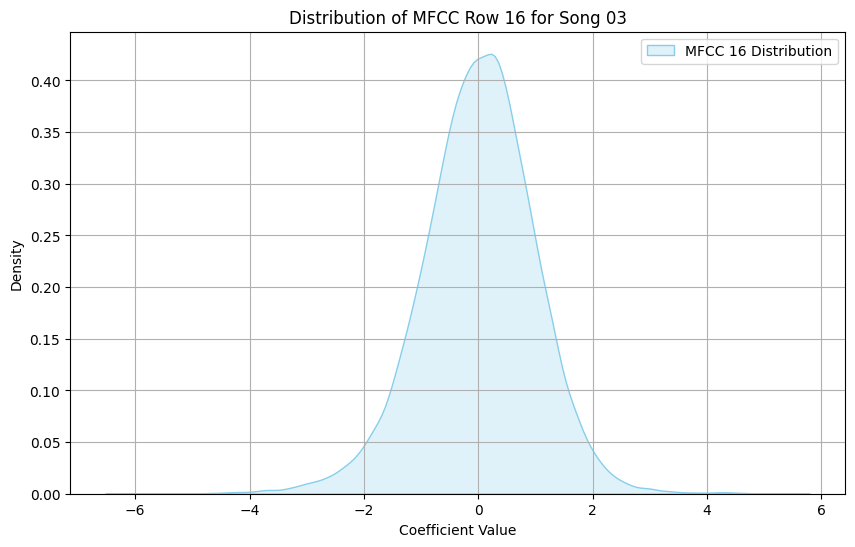

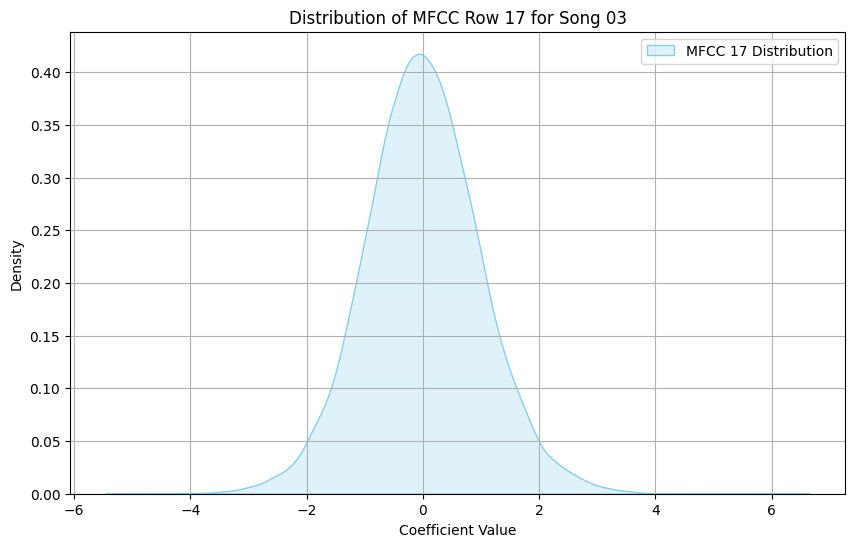

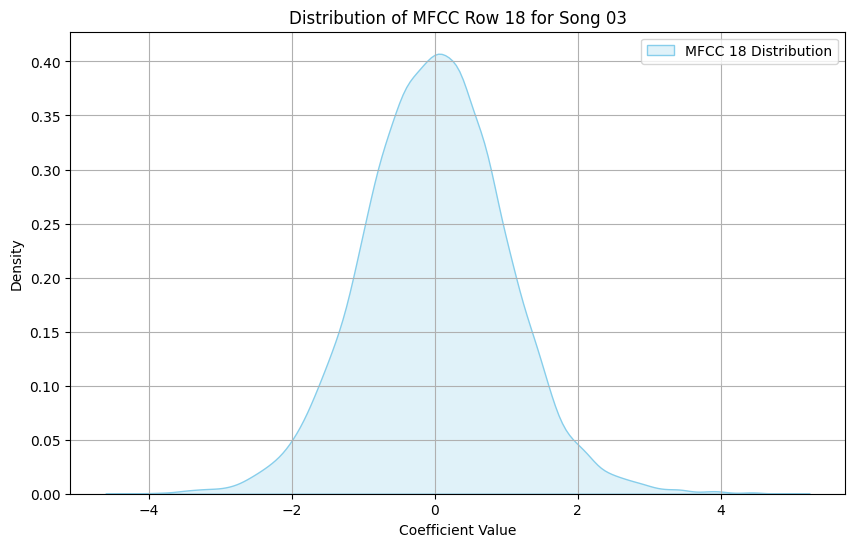

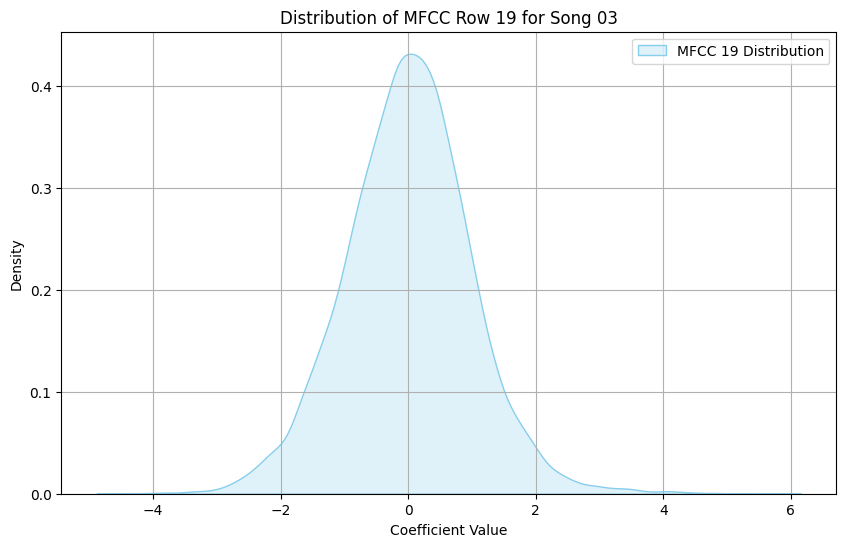

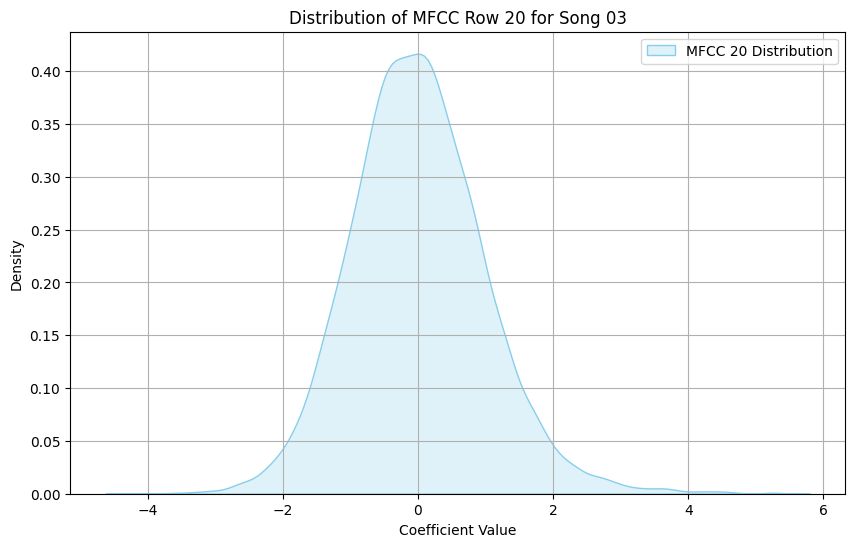

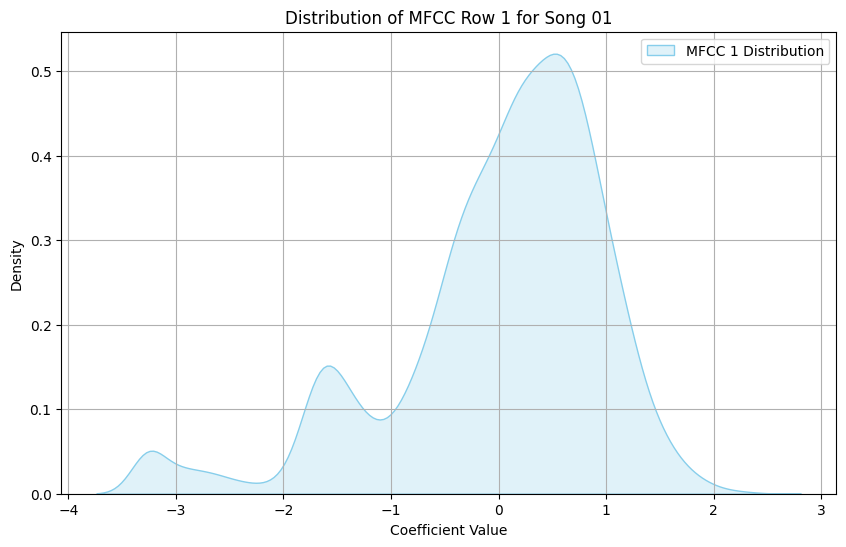

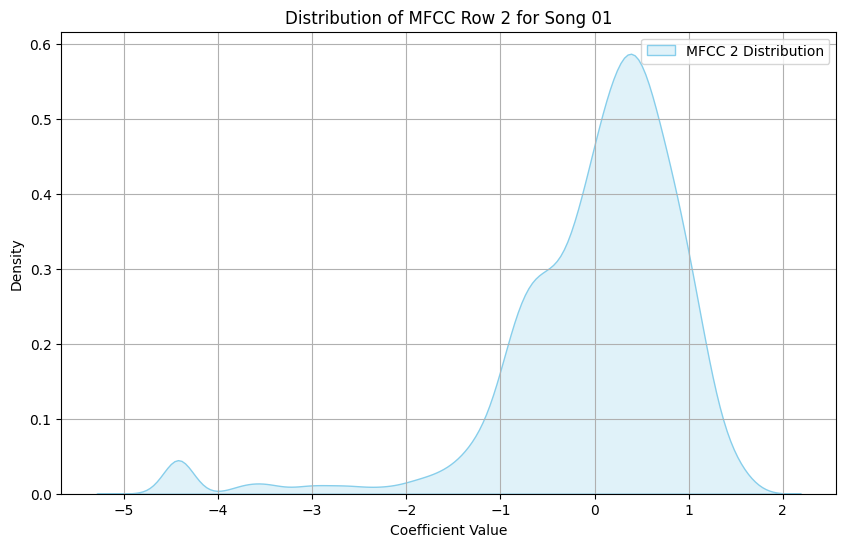

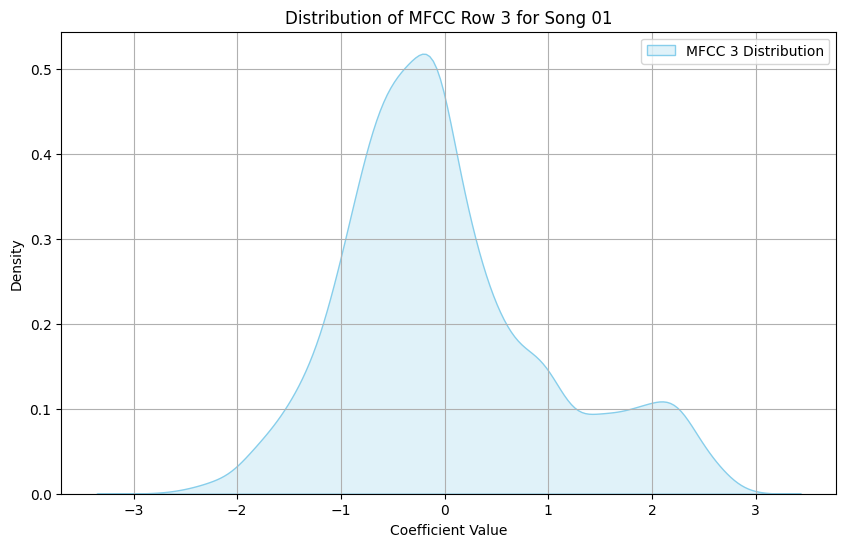

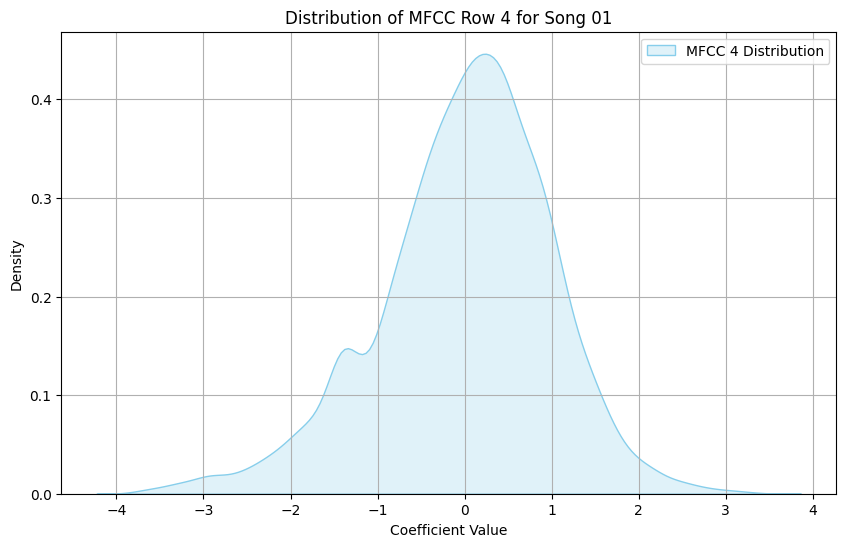

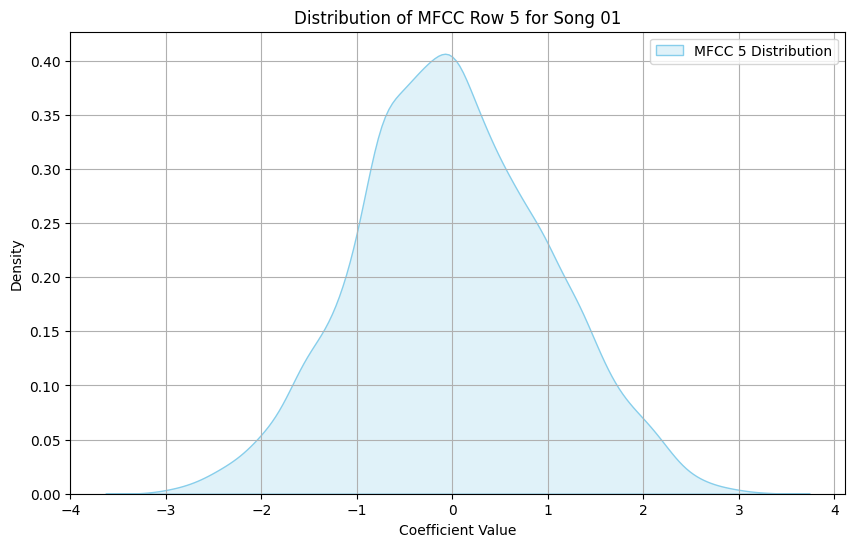

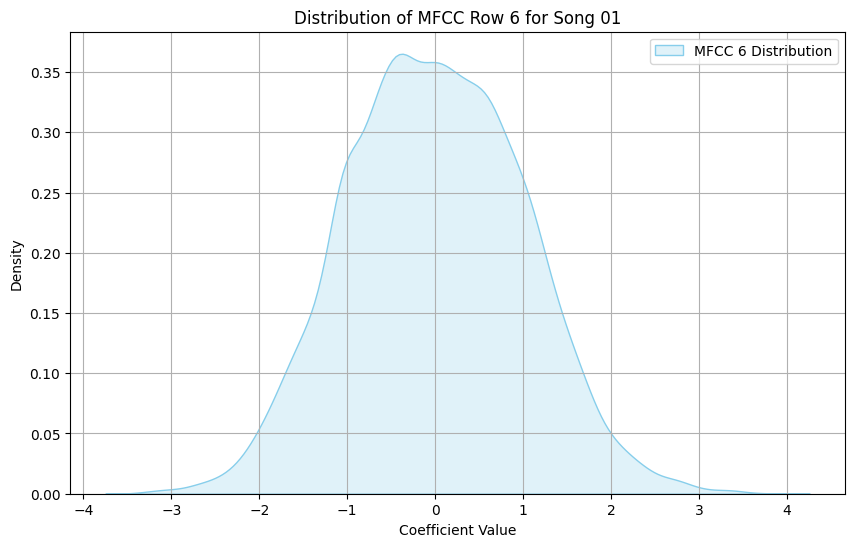

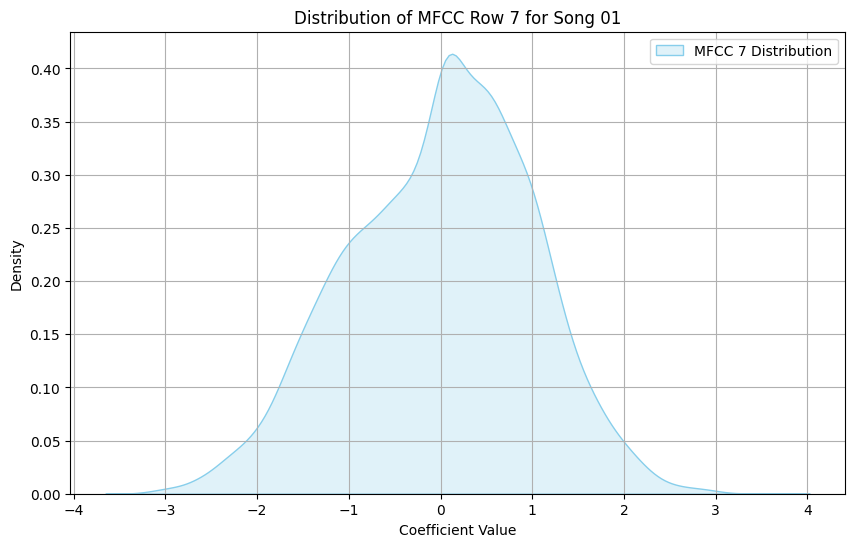

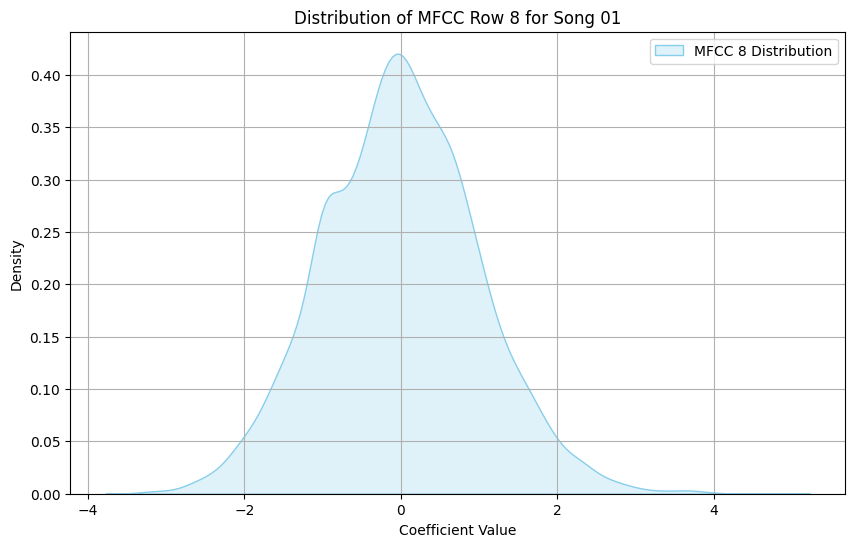

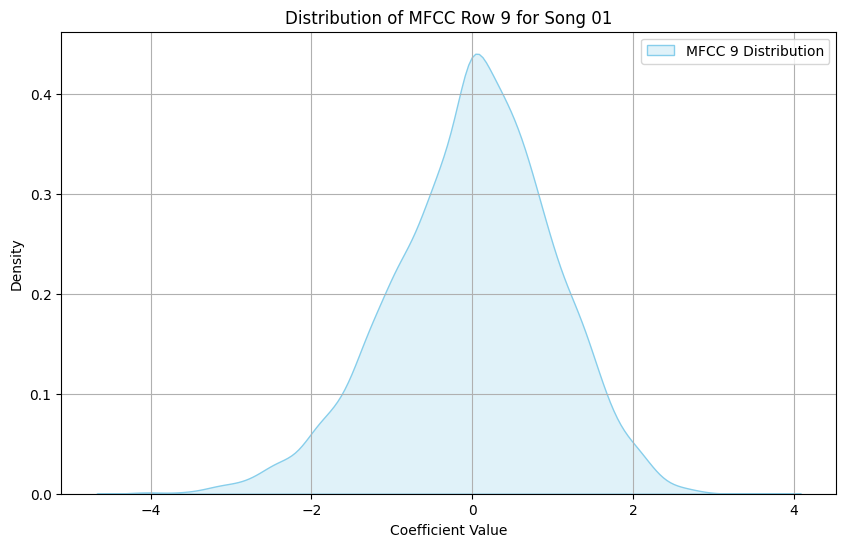

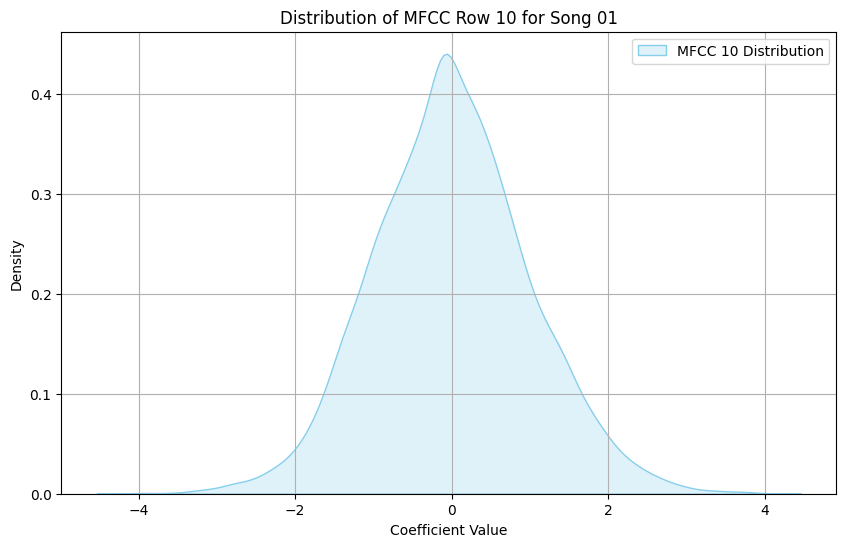

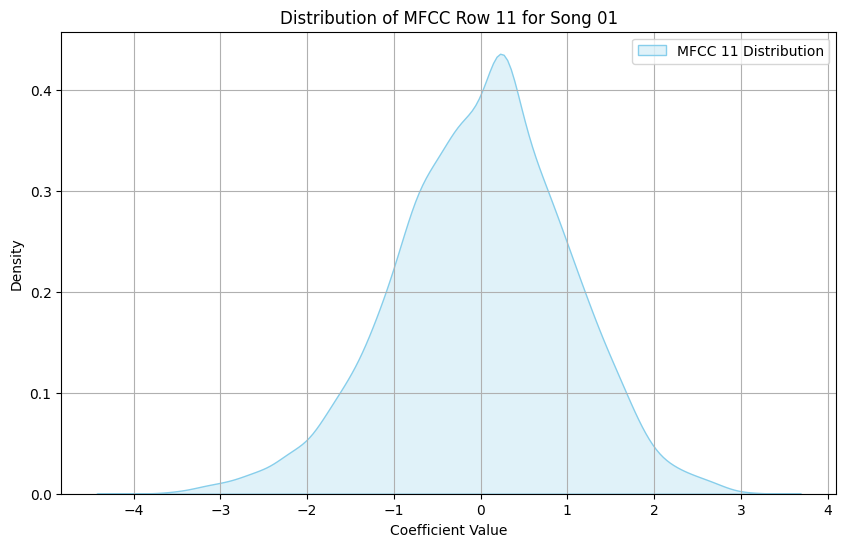

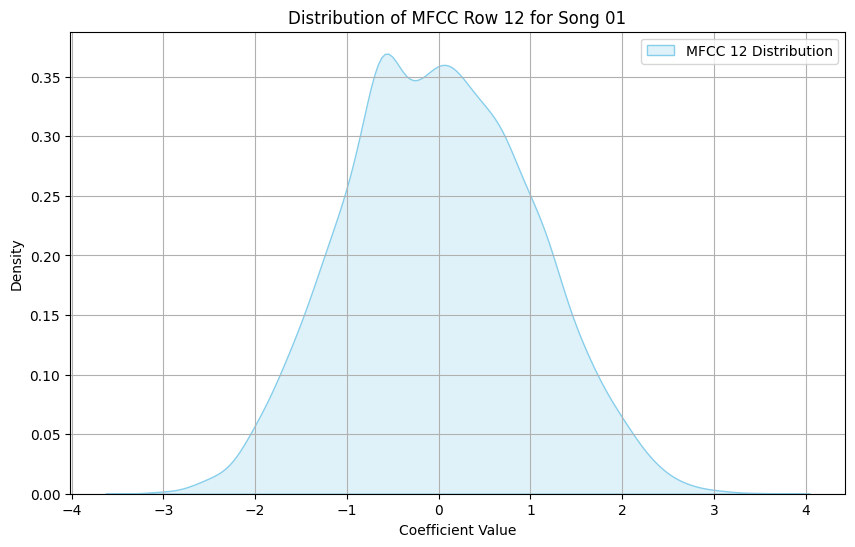

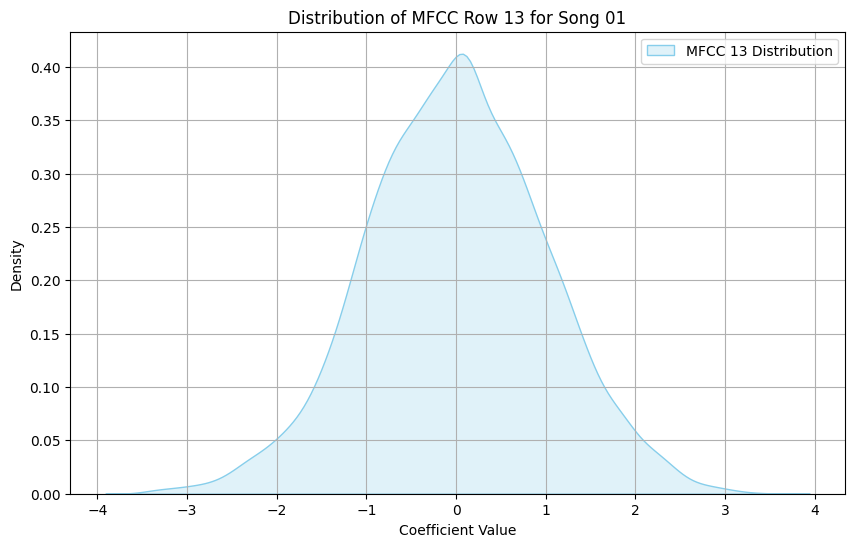

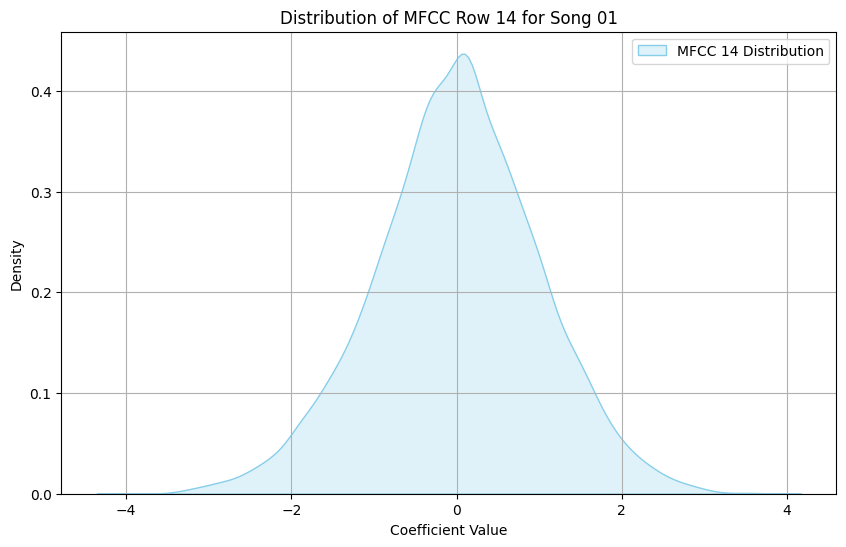

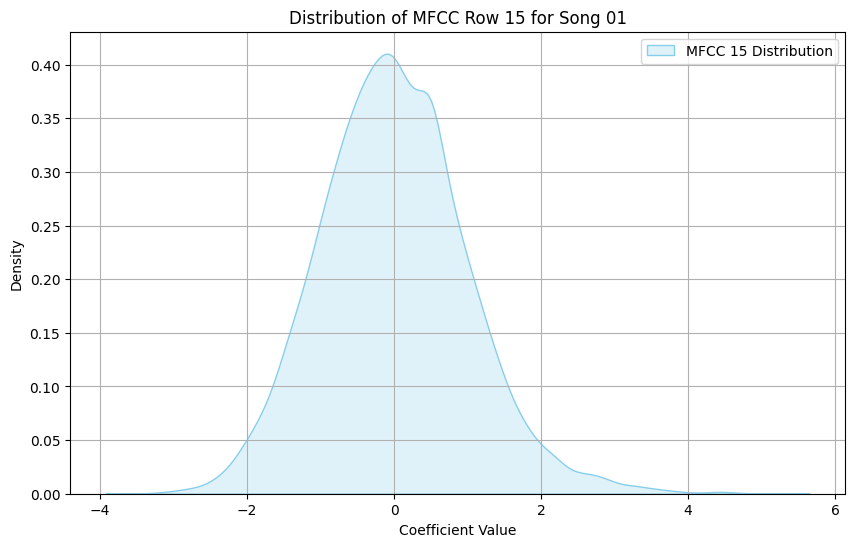

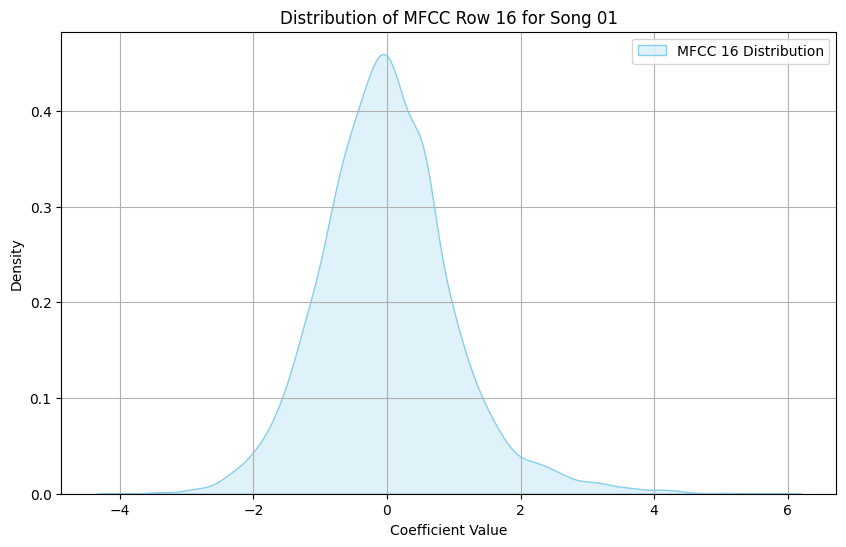

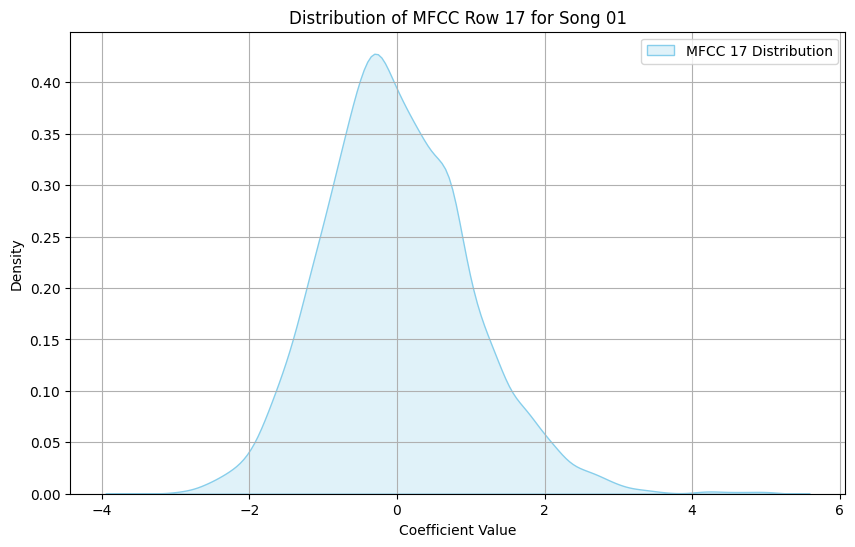

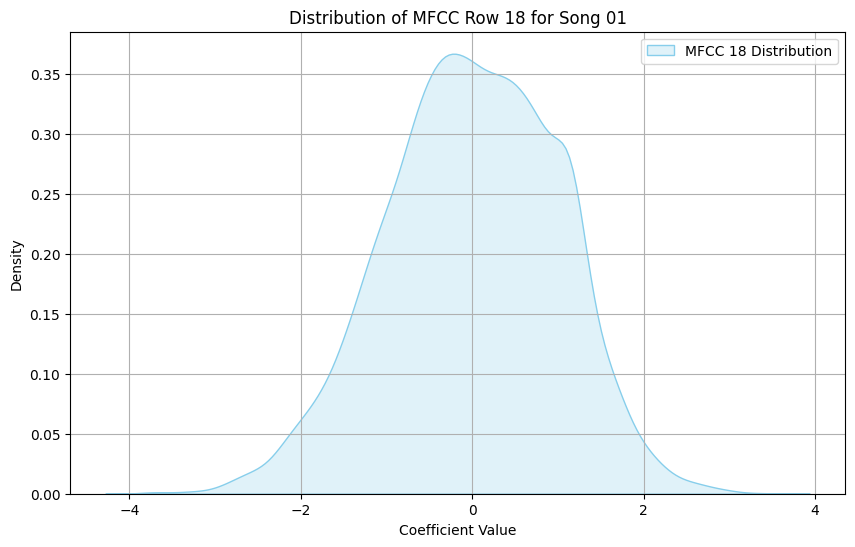

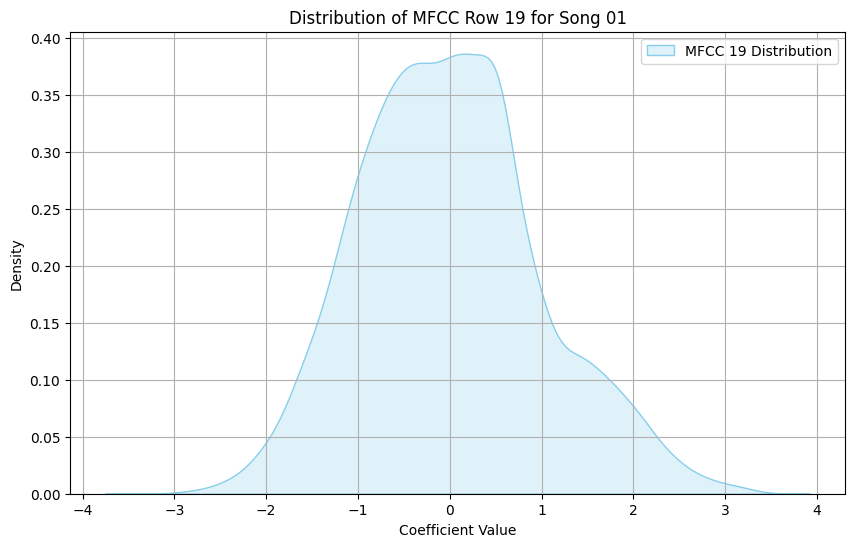

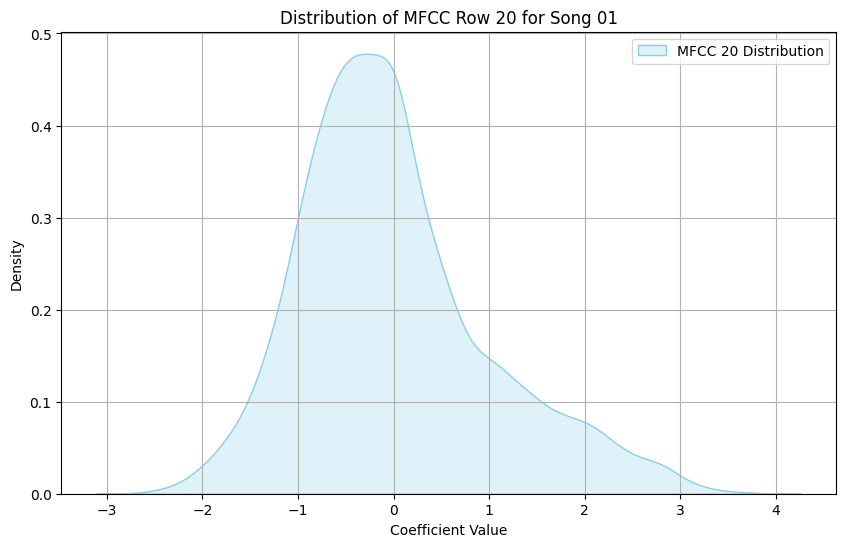

In [29]:
# Function to load MFCC data for a given song, scale each row, and plot its distribution
for song_number in song_numbers:
    def plot_scaled_distribution_for_song(data_directory, song_number):
        file_name = f'{song_number}-MFCC.csv'
        file_path = os.path.join(data_directory, file_name)
        
        if os.path.exists(file_path):
            mfcc_data = pd.read_csv(file_path, header=None)
            
            # Scale each row individually
            scaler = StandardScaler()
            scaled_mfcc_data = scaler.fit_transform(mfcc_data.T).T  # Transpose for scaling each row independently
            scaled_mfcc_data_df = pd.DataFrame(scaled_mfcc_data)
    # Loop through each row (MFCC coefficient) and plot its distribution
            for row_num in range(scaled_mfcc_data_df.shape[0]):
                plt.figure(figsize=(10, 6))
                sns.kdeplot(scaled_mfcc_data_df.iloc[row_num, :], fill=True, color="skyblue", label=f'MFCC {row_num+1} Distribution')
                plt.title(f'Distribution of MFCC Row {row_num+1} for Song {song_number}')
                plt.xlabel('Coefficient Value')
                plt.ylabel('Density')
                plt.legend()
                plt.grid()
                plt.show()  # Display the distribution plot
        else:
            print(f"File {file_name} not found in directory.")
    
    # Plot scaled distribution curves for each row in the specified song
    plot_scaled_distribution_for_song(data_directory, song_number)